# Brain Tumor Detection and Analysis of different algorithms.

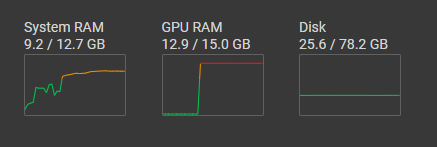

In [1]:
import os
import cv2
import keras 
from keras.models import Sequential
from keras.layers import Dropout, BatchNormalization, Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image, ImageOps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
plt.style.use('dark_background')
# from google.colab.patches import cv2_imshow

In [2]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [3]:
paths_yes = []
for r, d, f in os.walk(r"D:\Tumor Detection\BRAIN_MRI_IMAGE_DATA_SET\data sets\yes"):
    for file in f:
        if '.jpg' in file:
            paths_yes.append(os.path.join(r, file))

paths_no = []
for r, d, f in os.walk(r"D:\Tumor Detection\BRAIN_MRI_IMAGE_DATA_SET\data sets\no"):
    for file in f:
        if '.jpg' in file:
            paths_no.append(os.path.join(r, file))

In [ ]:
img_y = cv2.imread("D:\Tumor Detection\BRAIN_MRI_IMAGE_DATA_SET\data sets\yes\y0.jpg")

# Image Preprocessing

## HOG


In [4]:
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
from skimage import io, color
import matplotlib.pyplot as plt

%matplotlib inline
def give_hog(img):
    #reading the image
#     cv2.imshow('img', img)
#     print(img.shape)
    #creating hog features 
    fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
#     cv2.imshow('img', hog_image)
#     print(hog_image.shape)
    return hog_image

# give_hog(img_y)
# give_hog(img_n)

## SIFT


In [5]:
import cv2
def give_sift(img):
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Initialize the SIFT detector
    sift = cv2.xfeatures2d.SIFT_create()

    # Detect and compute keypoints and descriptors
    keypoints, descriptors = sift.detectAndCompute(gray, None)

    # Draw the detected keypoints on the input image
    img_with_keypoints = cv2.drawKeypoints(img, keypoints, None)

    # Save the output image
    # cv2.imwrite("output_image.jpg", img_with_keypoints)
    # cv2_imshow(img_with_keypoints)
    return img_with_keypoints

# give_sift(img_y)
# give_sift(img_n)

## ORB

In [6]:
def give_orb(img):
    # Create ORB object
    orb = cv2.ORB_create()

    # Detect keypoints and compute descriptors
    keypoints, descriptors = orb.detectAndCompute(img, None)

    # Draw keypoints on the image
    img_keypoints = cv2.drawKeypoints(img, keypoints, None)

    # Display the image with keypoints
    # cv2_imshow(img_keypoints)
    return img_keypoints
# give_orb(img_y)
# give_orb(img_n)

## Connected Component Analysis

In [7]:
def connected_component_analysis(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Apply binary thresholding
    # _, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    _,thresh = cv2.threshold(img,150,255,cv2.THRESH_TOZERO)
    # Apply connected component analysis
    connectivity = 4  # 8-way (or) 4-way connectivity
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh, connectivity, cv2.CV_32S)
    # Loop through each component
    output = np.zeros(img.shape, dtype="uint8")
    area_arr = []
    for i in range(1, num_labels):
        area_arr.append(stats[i, cv2.CC_STAT_AREA])
    area_arr.sort(reverse=True)
    output = np.zeros(img.shape, dtype="uint8")
    for i in range(1, num_labels):
        area = stats[i, cv2.CC_STAT_AREA]  
        # print(area)
        if (area in area_arr[:5]): # - 1) and (area < max(area_arr) + 1):
        # if area > 0:
            # print(area)
            # Labels stores all the IDs of the components on the each pixel
            # It has the same dimension as the threshold
            # So we'll check the component
            # then convert it to 255 value to mark it white
            componentMask = (labels == i).astype("uint8") * 255
            
            # Creating the Final output mask
            output = cv2.bitwise_or(output, componentMask)
            # cv2_imshow(output)
    return output

# for img in data:
#     connected_component_analysis(img)
# connected_component_analysis(img_n)
# img_y = cv2.imread('/content/drive/MyDrive/Brain Tumor Detection/BRAIN_MRI_IMAGE_DATA_SET/data sets/yes/y0.jpg')
# connected_component_analysis(img_y)

## PCA

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA

def give_pca(img, principle_components):
    # Splitting the image in R,G,B arrays.
    # pca = PCA(principle_components)
    # transformed = pca.fit_transform(img)
    # inverted = pca.inverse_transform(transformed)
    # cv2_imshow(inverted)
    # plt.imshow(inverted)
    # return
    # img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    blue,green,red = cv2.split(img)
    #initialize PCA with first 20 principal components
    pca = PCA(principle_components)
    
    #Applying to red channel and then applying inverse transform to transformed array.
    red_transformed = pca.fit_transform(red)
    red_inverted = pca.inverse_transform(red_transformed)
    
    #Applying to Green channel and then applying inverse transform to transformed array.
    green_transformed = pca.fit_transform(green)
    green_inverted = pca.inverse_transform(green_transformed)
    
    #Applying to Blue channel and then applying inverse transform to transformed array.
    blue_transformed = pca.fit_transform(blue)
    blue_inverted = pca.inverse_transform(blue_transformed)
    img_compressed = (np.dstack((red_inverted, red_inverted, red_inverted))).astype(np.uint8)
    #viewing the compressed image
#     cv2_imshow(img_compressed)
    # plt.imshow(img_compressed)
    return img_compressed

def give_pcag(img, principle_components):
    # Splitting the image in R,G,B arrays.
    pca = PCA(principle_components)
    transformed = pca.fit_transform(img)
    inverted = pca.inverse_transform(transformed)
#     cv2_imshow(inverted)
    # plt.imshow(inverted)
    return inverted

# Neural Network Implementation:- VGG16, VGG19

## Dataset Input

In [ ]:
data = []
result = []
def image_input(paths, result_int):
    i = 0
    for path in paths:
        img = cv2.imread(path)
        img = cv2.resize(img, (224, 224))
        print(result_int, i, img.shape)
        i += 1
        if(img.shape == (224,224,3)):
            data.append(np.array(img))
            result.append([result_int])

image_input(paths_yes, 0)
image_input(paths_no, 1)

In [ ]:
data = np.array(data)
data.shape

In [ ]:
result = np.array(result)
result = result.reshape(3000,1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, result, test_size=0.2, shuffle = True, random_state = 8)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state= 8)

In [ ]:
x_train, x_val, x_test = np.array(x_train), np.array(x_val), np.array(x_test)
y_train, y_val, y_test = np.array(y_train), np.array(y_val), np.array(y_test)

In [ ]:
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape)

In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)
y_train, y_val = np.array(y_train), np.array(y_val)

In [ ]:
y_test = to_categorical(y_test, num_classes=2)
y_test = np.array(y_test)

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=10)

In [ ]:
tf.config.run_functions_eagerly(True)

## VGG16

In [ ]:
# gpu_options = tf.GPUOptions(allow_growth=True)
# session = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))|
model_VGG_16 = tf.keras.applications.VGG16(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling=max,
    classes=2,
    classifier_activation="sigmoid",
)

opt = Adam(lr=0.001)
model_VGG_16.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history_vgg16 = model_VGG_16.fit(
    x_train, y_train, 
    epochs=100, batch_size=40, 
    validation_data=(x_val, y_val), callbacks=[es]
)

In [ ]:
print("Evaluate on test data")
results_vgg16 = model_VGG_16.evaluate(x_test, y_test, batch_size=64)
print("test loss, test acc:", results_vgg16)

## VGG19

In [ ]:
model_VGG_19 = tf.keras.applications.VGG19(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling=max,
    classes=2,
    classifier_activation="sigmoid",
)

opt = Adam(lr=0.001)
model_VGG_19.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history_vgg19 = model_VGG_19.fit(x_train, y_train, epochs = 100, batch_size = 40, validation_data = (x_val, y_val), callbacks=[es])

In [ ]:
print("Evaluate on test data")
results_vgg19 = model_VGG_19.evaluate(x_test, y_test, batch_size=64)
print("test loss, test acc:", results_vgg19)

In [ ]:
# print(history)
def plot_graph_of_history(histories, arch_name, epoch_range):
    for history in histories:
        loss_train = history.history['accuracy']
        loss_val = history.history['val_accuracy']
        epochs = range(1,epoch_range)
        plt.plot(epochs[:len(loss_train)], loss_train, label='Training accuracy {}'.format(arch_name))
        plt.plot(epochs[:len(loss_val)], loss_val, label='validation accuracy {}'.format(arch_name))
        plt.xlim(1, 101)
        plt.title('Training and Validation accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
    plt.show()

In [ ]:
plot_graph_of_history([history_vgg16], 'VGG16', 30)

In [ ]:
plot_graph_of_history([history_vgg19], 'VGG19', 30)

In [ ]:
plot_graph_of_history([history_vgg16, history_vgg19], 'VGG16 and VGG19', 30)

# Machine Learning Algorithms Implementation

## K Fold Cross Validation

In [9]:
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
      _scoring = ['accuracy', 'recall']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean()
              }

In [10]:
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

## KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier
def k_n_n(x_trainlr, y_trainlr, x_testlr, y_testlr):
    # Train the KNN algorithm
    for i in range(1, 6):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(x_trainlr, y_trainlr)
        # Predict the classes of the testing data
        y_pred = knn.predict(x_testlr)
        # Evaluate the performance of the algorithm
        accuracy = accuracy_score(y_testlr, y_pred)
        recall = recall_score(y_testlr, y_pred)
        cm = confusion_matrix(y_testlr,y_pred)
        print('accuracy of KNN with n =', i, 'is', accuracy)
        print('recall of KNN with n =', i, 'is', recall)
        print('confusion matrix of KNN with n =', i, 'is', cm)
        print()
        del knn, y_pred

In [12]:
from sklearn.neighbors import KNeighborsClassifier
def k_n_n_c(datalr, result_lr):
    # Train the KNN algorithm
    for i in range(1, 6):
        print('n =', i)
        knn = KNeighborsClassifier(n_neighbors=i)
        knn = cross_validation(knn, datalr, resultlr, 5)
        print(knn)
        # Plot Accuracy Result
        model_name = "KNN"
        plot_result(model_name,
                    "Accuracy",
                    "Accuracy scores in 5 Folds",
                    knn["Training Accuracy scores"],
                    knn["Validation Accuracy scores"])
        plot_result(model_name,
                    "Recall",
                    "Recall scores in 5 Folds",
                    knn["Training Recall scores"],
                    knn["Validation Recall scores"])
        del knn

## Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
def logistic_regression(x_trainlr, y_trainlr, x_testlr, y_testlr):
    solvers = ['lbfgs', 'liblinear', 'newton-cg']
#     ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
    for sol in solvers:
        logisticRegr = LogisticRegression(solver=sol, max_iter=100000)
        logisticRegr.fit(x_trainlr, y_trainlr)
        y_pred = logisticRegr.predict(x_testlr)
        accuracy = accuracy_score(y_testlr, y_pred)
        recall = recall_score(y_testlr, y_pred)
        cm = confusion_matrix(y_testlr,y_pred)
        print('accuracy of LogisticRegression with solver =', sol, 'is', accuracy)
        print('recall of LogisticRegression with solver =', sol, 'is', recall)
        print('confusion matrix of LogisticRegression with solver =', sol, 'is', cm)
        print()
        del logisticRegr, y_pred

In [14]:
from sklearn.linear_model import LogisticRegression
def logistic_regression_c(datalr, resultlr):
    solvers = ['lbfgs', 'liblinear', 'newton-cg']
#     ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
    for sol in solvers:
        print('solver =', sol)
        logisticRegr = LogisticRegression(solver=sol, max_iter=100000)
        logisticRegr = cross_validation(logisticRegr, datalr, resultlr, 5)
        model_name = "logistic_regression with solver {}".format(sol)
        plot_result(model_name,
                    "Accuracy",
                    "Accuracy scores in 5 Folds",
                    logisticRegr["Training Accuracy scores"],
                    logisticRegr["Validation Accuracy scores"])
        plot_result(model_name,
                    "Recall",
                    "Recall scores in 5 Folds",
                    logisticRegr["Training Recall scores"],
                    logisticRegr["Validation Recall scores"])
        del logisticRegr

## SVM

In [15]:
from sklearn.svm import SVC
def s_v_m(x_trainlr, y_trainlr, x_testlr, y_testlr):
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    for ker in kernels:
        svr = SVC(kernel = ker,C = 1000)
        svr.fit(x_trainlr,y_trainlr)
        y_pred = svr.predict(x_testlr)
        accuracy = accuracy_score(y_testlr, y_pred)
        recall = recall_score(y_testlr, y_pred)
        cm = confusion_matrix(y_testlr,y_pred)
        print('accuracy of SVM with kernel =', ker, 'is', accuracy)
        print('recall of SVM with kernel =', ker, 'is', recall)
        print('confusion matrix of SVM with kernel =', ker, 'is', cm)
        print()
        del svr, y_pred

In [16]:
from sklearn.svm import SVC
def s_v_m_c(datalr, resultlr):
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    for ker in kernels:
        svr = SVC(kernel = ker,C = 1000)
        svr = cross_validation(svr, datalr, resultlr, 5)
        print('kernel =', ker)
        model_name = "svm with kernel {}".format(ker)
        plot_result(model_name,
                    "Accuracy",
                    "Accuracy scores in 5 Folds",
                    svr["Training Accuracy scores"],
                    svr["Validation Accuracy scores"])
        plot_result(model_name,
                    "Recall",
                    "Recall scores in 5 Folds",
                    svr["Training Recall scores"],
                    svr["Validation Recall scores"])
        del svr

## Naive Bayes Classifier

In [17]:
from sklearn.naive_bayes import GaussianNB
def n_b_g(x_trainlr, y_trainlr, x_testlr, y_testlr):
    # Train Naive Bayes classifier
    clf = GaussianNB()
    clf.fit(x_trainlr, y_trainlr)
    # Predict labels for testing set
    y_pred = clf.predict(x_testlr)
    accuracy = accuracy_score(y_testlr, y_pred)
    recall = recall_score(y_testlr, y_pred)
    cm = confusion_matrix(y_testlr,y_pred)
    print('accuracy of Naive Bayes Classifier is', accuracy)
    print('recall of Naive Bayes Classifier is', recall)
    print('confusion matrix of Naive Bayes Classifier is', cm)
    print()
    del clf

In [18]:
from sklearn.naive_bayes import GaussianNB
def n_b_g_c(datalr, resultlr):
    # Train Naive Bayes classifier
    clf = GaussianNB()
    clf = cross_validation(clf, datalr, resultlr, 5)
    model_name = "naive_bayes"
    plot_result(model_name,
                "Accuracy",
                "Accuracy scores in 5 Folds",
                clf["Training Accuracy scores"],
                clf["Validation Accuracy scores"])
    plot_result(model_name,
                "Recall",
                "Recall scores in 5 Folds",
                clf["Training Recall scores"],
                clf["Validation Recall scores"])
    del clf

## Creating Dataset For Training

## Normal Image

In [19]:
datalr = []
resultlr = []
# k = []

def data_input_lr(pathslr, op):
    i = 0
    for path in pathslr:
        img = cv2.imread(path)
        img = cv2.resize(img, (224, 224))
        print(op, i, img.shape)
        i += 1
        if(img.shape == (224,224,3)):
            nsamples, nx, ny = img.shape
            img = img.reshape((nsamples,nx*ny))
            img = np.array(img)
            datalr.append(np.array(img))
            resultlr.append(op)


data_input_lr(paths_yes, 0)
data_input_lr(paths_no, 1)
print(len(datalr), len(resultlr))

datalr = np.array(datalr)
print(datalr.shape)
nsamples, nx, ny = datalr.shape
# print(x)
# 
datalr = datalr.reshape((nsamples,nx*ny))
print(datalr.shape)
print(len(datalr), len(resultlr))
x_trainlr, x_testlr, y_trainlr, y_testlr = train_test_split(datalr, resultlr, test_size=0.25, random_state=0)
print(len(x_trainlr), len(x_testlr))

0 0 (224, 224, 3)
0 1 (224, 224, 3)
0 2 (224, 224, 3)
0 3 (224, 224, 3)
0 4 (224, 224, 3)
0 5 (224, 224, 3)
0 6 (224, 224, 3)
0 7 (224, 224, 3)
0 8 (224, 224, 3)
0 9 (224, 224, 3)
0 10 (224, 224, 3)
0 11 (224, 224, 3)
0 12 (224, 224, 3)
0 13 (224, 224, 3)
0 14 (224, 224, 3)
0 15 (224, 224, 3)
0 16 (224, 224, 3)
0 17 (224, 224, 3)
0 18 (224, 224, 3)
0 19 (224, 224, 3)
0 20 (224, 224, 3)
0 21 (224, 224, 3)
0 22 (224, 224, 3)
0 23 (224, 224, 3)
0 24 (224, 224, 3)
0 25 (224, 224, 3)
0 26 (224, 224, 3)
0 27 (224, 224, 3)
0 28 (224, 224, 3)
0 29 (224, 224, 3)
0 30 (224, 224, 3)
0 31 (224, 224, 3)
0 32 (224, 224, 3)
0 33 (224, 224, 3)
0 34 (224, 224, 3)
0 35 (224, 224, 3)
0 36 (224, 224, 3)
0 37 (224, 224, 3)
0 38 (224, 224, 3)
0 39 (224, 224, 3)
0 40 (224, 224, 3)
0 41 (224, 224, 3)
0 42 (224, 224, 3)
0 43 (224, 224, 3)
0 44 (224, 224, 3)
0 45 (224, 224, 3)
0 46 (224, 224, 3)
0 47 (224, 224, 3)
0 48 (224, 224, 3)
0 49 (224, 224, 3)
0 50 (224, 224, 3)
0 51 (224, 224, 3)
0 52 (224, 224, 3)
0 5

0 421 (224, 224, 3)
0 422 (224, 224, 3)
0 423 (224, 224, 3)
0 424 (224, 224, 3)
0 425 (224, 224, 3)
0 426 (224, 224, 3)
0 427 (224, 224, 3)
0 428 (224, 224, 3)
0 429 (224, 224, 3)
0 430 (224, 224, 3)
0 431 (224, 224, 3)
0 432 (224, 224, 3)
0 433 (224, 224, 3)
0 434 (224, 224, 3)
0 435 (224, 224, 3)
0 436 (224, 224, 3)
0 437 (224, 224, 3)
0 438 (224, 224, 3)
0 439 (224, 224, 3)
0 440 (224, 224, 3)
0 441 (224, 224, 3)
0 442 (224, 224, 3)
0 443 (224, 224, 3)
0 444 (224, 224, 3)
0 445 (224, 224, 3)
0 446 (224, 224, 3)
0 447 (224, 224, 3)
0 448 (224, 224, 3)
0 449 (224, 224, 3)
0 450 (224, 224, 3)
0 451 (224, 224, 3)
0 452 (224, 224, 3)
0 453 (224, 224, 3)
0 454 (224, 224, 3)
0 455 (224, 224, 3)
0 456 (224, 224, 3)
0 457 (224, 224, 3)
0 458 (224, 224, 3)
0 459 (224, 224, 3)
0 460 (224, 224, 3)
0 461 (224, 224, 3)
0 462 (224, 224, 3)
0 463 (224, 224, 3)
0 464 (224, 224, 3)
0 465 (224, 224, 3)
0 466 (224, 224, 3)
0 467 (224, 224, 3)
0 468 (224, 224, 3)
0 469 (224, 224, 3)
0 470 (224, 224, 3)


0 849 (224, 224, 3)
0 850 (224, 224, 3)
0 851 (224, 224, 3)
0 852 (224, 224, 3)
0 853 (224, 224, 3)
0 854 (224, 224, 3)
0 855 (224, 224, 3)
0 856 (224, 224, 3)
0 857 (224, 224, 3)
0 858 (224, 224, 3)
0 859 (224, 224, 3)
0 860 (224, 224, 3)
0 861 (224, 224, 3)
0 862 (224, 224, 3)
0 863 (224, 224, 3)
0 864 (224, 224, 3)
0 865 (224, 224, 3)
0 866 (224, 224, 3)
0 867 (224, 224, 3)
0 868 (224, 224, 3)
0 869 (224, 224, 3)
0 870 (224, 224, 3)
0 871 (224, 224, 3)
0 872 (224, 224, 3)
0 873 (224, 224, 3)
0 874 (224, 224, 3)
0 875 (224, 224, 3)
0 876 (224, 224, 3)
0 877 (224, 224, 3)
0 878 (224, 224, 3)
0 879 (224, 224, 3)
0 880 (224, 224, 3)
0 881 (224, 224, 3)
0 882 (224, 224, 3)
0 883 (224, 224, 3)
0 884 (224, 224, 3)
0 885 (224, 224, 3)
0 886 (224, 224, 3)
0 887 (224, 224, 3)
0 888 (224, 224, 3)
0 889 (224, 224, 3)
0 890 (224, 224, 3)
0 891 (224, 224, 3)
0 892 (224, 224, 3)
0 893 (224, 224, 3)
0 894 (224, 224, 3)
0 895 (224, 224, 3)
0 896 (224, 224, 3)
0 897 (224, 224, 3)
0 898 (224, 224, 3)


0 1262 (224, 224, 3)
0 1263 (224, 224, 3)
0 1264 (224, 224, 3)
0 1265 (224, 224, 3)
0 1266 (224, 224, 3)
0 1267 (224, 224, 3)
0 1268 (224, 224, 3)
0 1269 (224, 224, 3)
0 1270 (224, 224, 3)
0 1271 (224, 224, 3)
0 1272 (224, 224, 3)
0 1273 (224, 224, 3)
0 1274 (224, 224, 3)
0 1275 (224, 224, 3)
0 1276 (224, 224, 3)
0 1277 (224, 224, 3)
0 1278 (224, 224, 3)
0 1279 (224, 224, 3)
0 1280 (224, 224, 3)
0 1281 (224, 224, 3)
0 1282 (224, 224, 3)
0 1283 (224, 224, 3)
0 1284 (224, 224, 3)
0 1285 (224, 224, 3)
0 1286 (224, 224, 3)
0 1287 (224, 224, 3)
0 1288 (224, 224, 3)
0 1289 (224, 224, 3)
0 1290 (224, 224, 3)
0 1291 (224, 224, 3)
0 1292 (224, 224, 3)
0 1293 (224, 224, 3)
0 1294 (224, 224, 3)
0 1295 (224, 224, 3)
0 1296 (224, 224, 3)
0 1297 (224, 224, 3)
0 1298 (224, 224, 3)
0 1299 (224, 224, 3)
0 1300 (224, 224, 3)
0 1301 (224, 224, 3)
0 1302 (224, 224, 3)
0 1303 (224, 224, 3)
0 1304 (224, 224, 3)
0 1305 (224, 224, 3)
0 1306 (224, 224, 3)
0 1307 (224, 224, 3)
0 1308 (224, 224, 3)
0 1309 (224, 

1 190 (224, 224, 3)
1 191 (224, 224, 3)
1 192 (224, 224, 3)
1 193 (224, 224, 3)
1 194 (224, 224, 3)
1 195 (224, 224, 3)
1 196 (224, 224, 3)
1 197 (224, 224, 3)
1 198 (224, 224, 3)
1 199 (224, 224, 3)
1 200 (224, 224, 3)
1 201 (224, 224, 3)
1 202 (224, 224, 3)
1 203 (224, 224, 3)
1 204 (224, 224, 3)
1 205 (224, 224, 3)
1 206 (224, 224, 3)
1 207 (224, 224, 3)
1 208 (224, 224, 3)
1 209 (224, 224, 3)
1 210 (224, 224, 3)
1 211 (224, 224, 3)
1 212 (224, 224, 3)
1 213 (224, 224, 3)
1 214 (224, 224, 3)
1 215 (224, 224, 3)
1 216 (224, 224, 3)
1 217 (224, 224, 3)
1 218 (224, 224, 3)
1 219 (224, 224, 3)
1 220 (224, 224, 3)
1 221 (224, 224, 3)
1 222 (224, 224, 3)
1 223 (224, 224, 3)
1 224 (224, 224, 3)
1 225 (224, 224, 3)
1 226 (224, 224, 3)
1 227 (224, 224, 3)
1 228 (224, 224, 3)
1 229 (224, 224, 3)
1 230 (224, 224, 3)
1 231 (224, 224, 3)
1 232 (224, 224, 3)
1 233 (224, 224, 3)
1 234 (224, 224, 3)
1 235 (224, 224, 3)
1 236 (224, 224, 3)
1 237 (224, 224, 3)
1 238 (224, 224, 3)
1 239 (224, 224, 3)


1 619 (224, 224, 3)
1 620 (224, 224, 3)
1 621 (224, 224, 3)
1 622 (224, 224, 3)
1 623 (224, 224, 3)
1 624 (224, 224, 3)
1 625 (224, 224, 3)
1 626 (224, 224, 3)
1 627 (224, 224, 3)
1 628 (224, 224, 3)
1 629 (224, 224, 3)
1 630 (224, 224, 3)
1 631 (224, 224, 3)
1 632 (224, 224, 3)
1 633 (224, 224, 3)
1 634 (224, 224, 3)
1 635 (224, 224, 3)
1 636 (224, 224, 3)
1 637 (224, 224, 3)
1 638 (224, 224, 3)
1 639 (224, 224, 3)
1 640 (224, 224, 3)
1 641 (224, 224, 3)
1 642 (224, 224, 3)
1 643 (224, 224, 3)
1 644 (224, 224, 3)
1 645 (224, 224, 3)
1 646 (224, 224, 3)
1 647 (224, 224, 3)
1 648 (224, 224, 3)
1 649 (224, 224, 3)
1 650 (224, 224, 3)
1 651 (224, 224, 3)
1 652 (224, 224, 3)
1 653 (224, 224, 3)
1 654 (224, 224, 3)
1 655 (224, 224, 3)
1 656 (224, 224, 3)
1 657 (224, 224, 3)
1 658 (224, 224, 3)
1 659 (224, 224, 3)
1 660 (224, 224, 3)
1 661 (224, 224, 3)
1 662 (224, 224, 3)
1 663 (224, 224, 3)
1 664 (224, 224, 3)
1 665 (224, 224, 3)
1 666 (224, 224, 3)
1 667 (224, 224, 3)
1 668 (224, 224, 3)


1 1038 (224, 224, 3)
1 1039 (224, 224, 3)
1 1040 (224, 224, 3)
1 1041 (224, 224, 3)
1 1042 (224, 224, 3)
1 1043 (224, 224, 3)
1 1044 (224, 224, 3)
1 1045 (224, 224, 3)
1 1046 (224, 224, 3)
1 1047 (224, 224, 3)
1 1048 (224, 224, 3)
1 1049 (224, 224, 3)
1 1050 (224, 224, 3)
1 1051 (224, 224, 3)
1 1052 (224, 224, 3)
1 1053 (224, 224, 3)
1 1054 (224, 224, 3)
1 1055 (224, 224, 3)
1 1056 (224, 224, 3)
1 1057 (224, 224, 3)
1 1058 (224, 224, 3)
1 1059 (224, 224, 3)
1 1060 (224, 224, 3)
1 1061 (224, 224, 3)
1 1062 (224, 224, 3)
1 1063 (224, 224, 3)
1 1064 (224, 224, 3)
1 1065 (224, 224, 3)
1 1066 (224, 224, 3)
1 1067 (224, 224, 3)
1 1068 (224, 224, 3)
1 1069 (224, 224, 3)
1 1070 (224, 224, 3)
1 1071 (224, 224, 3)
1 1072 (224, 224, 3)
1 1073 (224, 224, 3)
1 1074 (224, 224, 3)
1 1075 (224, 224, 3)
1 1076 (224, 224, 3)
1 1077 (224, 224, 3)
1 1078 (224, 224, 3)
1 1079 (224, 224, 3)
1 1080 (224, 224, 3)
1 1081 (224, 224, 3)
1 1082 (224, 224, 3)
1 1083 (224, 224, 3)
1 1084 (224, 224, 3)
1 1085 (224, 

1 1458 (224, 224, 3)
1 1459 (224, 224, 3)
1 1460 (224, 224, 3)
1 1461 (224, 224, 3)
1 1462 (224, 224, 3)
1 1463 (224, 224, 3)
1 1464 (224, 224, 3)
1 1465 (224, 224, 3)
1 1466 (224, 224, 3)
1 1467 (224, 224, 3)
1 1468 (224, 224, 3)
1 1469 (224, 224, 3)
1 1470 (224, 224, 3)
1 1471 (224, 224, 3)
1 1472 (224, 224, 3)
1 1473 (224, 224, 3)
1 1474 (224, 224, 3)
1 1475 (224, 224, 3)
1 1476 (224, 224, 3)
1 1477 (224, 224, 3)
1 1478 (224, 224, 3)
1 1479 (224, 224, 3)
1 1480 (224, 224, 3)
1 1481 (224, 224, 3)
1 1482 (224, 224, 3)
1 1483 (224, 224, 3)
1 1484 (224, 224, 3)
1 1485 (224, 224, 3)
1 1486 (224, 224, 3)
1 1487 (224, 224, 3)
1 1488 (224, 224, 3)
1 1489 (224, 224, 3)
1 1490 (224, 224, 3)
1 1491 (224, 224, 3)
1 1492 (224, 224, 3)
1 1493 (224, 224, 3)
1 1494 (224, 224, 3)
1 1495 (224, 224, 3)
1 1496 (224, 224, 3)
1 1497 (224, 224, 3)
1 1498 (224, 224, 3)
1 1499 (224, 224, 3)
3000 3000
(3000, 224, 672)
(3000, 150528)
3000 3000
2250 750


In [21]:
k_n_n(x_trainlr, y_trainlr, x_testlr, y_testlr)
logistic_regression(x_trainlr, y_trainlr, x_testlr, y_testlr)
s_v_m(x_trainlr, y_trainlr, x_testlr, y_testlr)
n_b_g(x_trainlr, y_trainlr, x_testlr, y_testlr)

accuracy of KNN with n = 1 is 0.9533333333333334
recall of KNN with n = 1 is 0.9818731117824774
confusion matrix of KNN with n = 1 is [[390  29]
 [  6 325]]

accuracy of KNN with n = 2 is 0.9546666666666667
recall of KNN with n = 2 is 0.9577039274924471
confusion matrix of KNN with n = 2 is [[399  20]
 [ 14 317]]

accuracy of KNN with n = 3 is 0.9013333333333333
recall of KNN with n = 3 is 0.9788519637462235
confusion matrix of KNN with n = 3 is [[352  67]
 [  7 324]]

accuracy of KNN with n = 4 is 0.904
recall of KNN with n = 4 is 0.9637462235649547
confusion matrix of KNN with n = 4 is [[359  60]
 [ 12 319]]

accuracy of KNN with n = 5 is 0.8466666666666667
recall of KNN with n = 5 is 0.9818731117824774
confusion matrix of KNN with n = 5 is [[310 109]
 [  6 325]]

accuracy of LogisticRegression with solver = lbfgs is 0.9653333333333334
recall of LogisticRegression with solver = lbfgs is 0.9516616314199395
confusion matrix of LogisticRegression with solver = lbfgs is [[409  10]
 [ 16 

In [ ]:
print('knn')
k_n_n_c(datalr, resultlr)
print('logistic regression')
logistic_regression_c(datalr, resultlr)
print('support vector machine')
s_v_m_c(datalr, resultlr)
print('naive bayes')
n_b_g_c(datalr, resultlr)

In [23]:
del datalr, resultlr

## HOG

In [24]:
datalr = []
resultlr = []
# k = []

def data_input_lr(pathslr, op):
    i = 0
    for path in pathslr:
        img = cv2.imread(path)
        img_hog = give_hog(img)
        img_hog = cv2.resize(img_hog, (224, 224))
        img = cv2.resize(img, (224, 224))
        print(op, i, img.shape)
        i += 1
        if(img.shape == (224,224,3)):
            nsamples, nx, ny = img.shape
            img = img.reshape((nsamples,nx*ny))
            img = np.array(img)
            img_hog = np.concatenate([img_hog, img_hog, img_hog], axis=1)
            img_hog = np.array(img_hog)
#             print(img.shape, img_hog.shape)
            img = np.concatenate([img, img_hog], axis=1)
#             print(img.shape, np.concatenate([img_hog, img_hog], axis=0).shape)
            datalr.append(np.array(img))
            resultlr.append(op)
#             break


data_input_lr(paths_yes, 0)
data_input_lr(paths_no, 1)
# print(len(k))
# for i in k:
#     print(i)
print(len(datalr), len(resultlr))
datalr = np.array(datalr)
print(datalr.shape)
nsamples, nx, ny = datalr.shape
# print(x)
# 
datalr = datalr.reshape((nsamples,nx*ny))
print(datalr.shape)
print(len(datalr), len(resultlr))
x_trainlr, x_testlr, y_trainlr, y_testlr = train_test_split(datalr, resultlr, test_size=0.25, random_state=0)
print(len(x_trainlr), len(x_testlr))

0 0 (224, 224, 3)
0 1 (224, 224, 3)
0 2 (224, 224, 3)
0 3 (224, 224, 3)
0 4 (224, 224, 3)
0 5 (224, 224, 3)
0 6 (224, 224, 3)
0 7 (224, 224, 3)
0 8 (224, 224, 3)
0 9 (224, 224, 3)
0 10 (224, 224, 3)
0 11 (224, 224, 3)
0 12 (224, 224, 3)
0 13 (224, 224, 3)
0 14 (224, 224, 3)
0 15 (224, 224, 3)
0 16 (224, 224, 3)
0 17 (224, 224, 3)
0 18 (224, 224, 3)
0 19 (224, 224, 3)
0 20 (224, 224, 3)
0 21 (224, 224, 3)
0 22 (224, 224, 3)
0 23 (224, 224, 3)
0 24 (224, 224, 3)
0 25 (224, 224, 3)
0 26 (224, 224, 3)
0 27 (224, 224, 3)
0 28 (224, 224, 3)
0 29 (224, 224, 3)
0 30 (224, 224, 3)
0 31 (224, 224, 3)
0 32 (224, 224, 3)
0 33 (224, 224, 3)
0 34 (224, 224, 3)
0 35 (224, 224, 3)
0 36 (224, 224, 3)
0 37 (224, 224, 3)
0 38 (224, 224, 3)
0 39 (224, 224, 3)
0 40 (224, 224, 3)
0 41 (224, 224, 3)
0 42 (224, 224, 3)
0 43 (224, 224, 3)
0 44 (224, 224, 3)
0 45 (224, 224, 3)
0 46 (224, 224, 3)
0 47 (224, 224, 3)
0 48 (224, 224, 3)
0 49 (224, 224, 3)
0 50 (224, 224, 3)
0 51 (224, 224, 3)
0 52 (224, 224, 3)
0 5

0 416 (224, 224, 3)
0 417 (224, 224, 3)
0 418 (224, 224, 3)
0 419 (224, 224, 3)
0 420 (224, 224, 3)
0 421 (224, 224, 3)
0 422 (224, 224, 3)
0 423 (224, 224, 3)
0 424 (224, 224, 3)
0 425 (224, 224, 3)
0 426 (224, 224, 3)
0 427 (224, 224, 3)
0 428 (224, 224, 3)
0 429 (224, 224, 3)
0 430 (224, 224, 3)
0 431 (224, 224, 3)
0 432 (224, 224, 3)
0 433 (224, 224, 3)
0 434 (224, 224, 3)
0 435 (224, 224, 3)
0 436 (224, 224, 3)
0 437 (224, 224, 3)
0 438 (224, 224, 3)
0 439 (224, 224, 3)
0 440 (224, 224, 3)
0 441 (224, 224, 3)
0 442 (224, 224, 3)
0 443 (224, 224, 3)
0 444 (224, 224, 3)
0 445 (224, 224, 3)
0 446 (224, 224, 3)
0 447 (224, 224, 3)
0 448 (224, 224, 3)
0 449 (224, 224, 3)
0 450 (224, 224, 3)
0 451 (224, 224, 3)
0 452 (224, 224, 3)
0 453 (224, 224, 3)
0 454 (224, 224, 3)
0 455 (224, 224, 3)
0 456 (224, 224, 3)
0 457 (224, 224, 3)
0 458 (224, 224, 3)
0 459 (224, 224, 3)
0 460 (224, 224, 3)
0 461 (224, 224, 3)
0 462 (224, 224, 3)
0 463 (224, 224, 3)
0 464 (224, 224, 3)
0 465 (224, 224, 3)


0 826 (224, 224, 3)
0 827 (224, 224, 3)
0 828 (224, 224, 3)
0 829 (224, 224, 3)
0 830 (224, 224, 3)
0 831 (224, 224, 3)
0 832 (224, 224, 3)
0 833 (224, 224, 3)
0 834 (224, 224, 3)
0 835 (224, 224, 3)
0 836 (224, 224, 3)
0 837 (224, 224, 3)
0 838 (224, 224, 3)
0 839 (224, 224, 3)
0 840 (224, 224, 3)
0 841 (224, 224, 3)
0 842 (224, 224, 3)
0 843 (224, 224, 3)
0 844 (224, 224, 3)
0 845 (224, 224, 3)
0 846 (224, 224, 3)
0 847 (224, 224, 3)
0 848 (224, 224, 3)
0 849 (224, 224, 3)
0 850 (224, 224, 3)
0 851 (224, 224, 3)
0 852 (224, 224, 3)
0 853 (224, 224, 3)
0 854 (224, 224, 3)
0 855 (224, 224, 3)
0 856 (224, 224, 3)
0 857 (224, 224, 3)
0 858 (224, 224, 3)
0 859 (224, 224, 3)
0 860 (224, 224, 3)
0 861 (224, 224, 3)
0 862 (224, 224, 3)
0 863 (224, 224, 3)
0 864 (224, 224, 3)
0 865 (224, 224, 3)
0 866 (224, 224, 3)
0 867 (224, 224, 3)
0 868 (224, 224, 3)
0 869 (224, 224, 3)
0 870 (224, 224, 3)
0 871 (224, 224, 3)
0 872 (224, 224, 3)
0 873 (224, 224, 3)
0 874 (224, 224, 3)
0 875 (224, 224, 3)


0 1226 (224, 224, 3)
0 1227 (224, 224, 3)
0 1228 (224, 224, 3)
0 1229 (224, 224, 3)
0 1230 (224, 224, 3)
0 1231 (224, 224, 3)
0 1232 (224, 224, 3)
0 1233 (224, 224, 3)
0 1234 (224, 224, 3)
0 1235 (224, 224, 3)
0 1236 (224, 224, 3)
0 1237 (224, 224, 3)
0 1238 (224, 224, 3)
0 1239 (224, 224, 3)
0 1240 (224, 224, 3)
0 1241 (224, 224, 3)
0 1242 (224, 224, 3)
0 1243 (224, 224, 3)
0 1244 (224, 224, 3)
0 1245 (224, 224, 3)
0 1246 (224, 224, 3)
0 1247 (224, 224, 3)
0 1248 (224, 224, 3)
0 1249 (224, 224, 3)
0 1250 (224, 224, 3)
0 1251 (224, 224, 3)
0 1252 (224, 224, 3)
0 1253 (224, 224, 3)
0 1254 (224, 224, 3)
0 1255 (224, 224, 3)
0 1256 (224, 224, 3)
0 1257 (224, 224, 3)
0 1258 (224, 224, 3)
0 1259 (224, 224, 3)
0 1260 (224, 224, 3)
0 1261 (224, 224, 3)
0 1262 (224, 224, 3)
0 1263 (224, 224, 3)
0 1264 (224, 224, 3)
0 1265 (224, 224, 3)
0 1266 (224, 224, 3)
0 1267 (224, 224, 3)
0 1268 (224, 224, 3)
0 1269 (224, 224, 3)
0 1270 (224, 224, 3)
0 1271 (224, 224, 3)
0 1272 (224, 224, 3)
0 1273 (224, 

1 128 (224, 224, 3)
1 129 (224, 224, 3)
1 130 (224, 224, 3)
1 131 (224, 224, 3)
1 132 (224, 224, 3)
1 133 (224, 224, 3)
1 134 (224, 224, 3)
1 135 (224, 224, 3)
1 136 (224, 224, 3)
1 137 (224, 224, 3)
1 138 (224, 224, 3)
1 139 (224, 224, 3)
1 140 (224, 224, 3)
1 141 (224, 224, 3)
1 142 (224, 224, 3)
1 143 (224, 224, 3)
1 144 (224, 224, 3)
1 145 (224, 224, 3)
1 146 (224, 224, 3)
1 147 (224, 224, 3)
1 148 (224, 224, 3)
1 149 (224, 224, 3)
1 150 (224, 224, 3)
1 151 (224, 224, 3)
1 152 (224, 224, 3)
1 153 (224, 224, 3)
1 154 (224, 224, 3)
1 155 (224, 224, 3)
1 156 (224, 224, 3)
1 157 (224, 224, 3)
1 158 (224, 224, 3)
1 159 (224, 224, 3)
1 160 (224, 224, 3)
1 161 (224, 224, 3)
1 162 (224, 224, 3)
1 163 (224, 224, 3)
1 164 (224, 224, 3)
1 165 (224, 224, 3)
1 166 (224, 224, 3)
1 167 (224, 224, 3)
1 168 (224, 224, 3)
1 169 (224, 224, 3)
1 170 (224, 224, 3)
1 171 (224, 224, 3)
1 172 (224, 224, 3)
1 173 (224, 224, 3)
1 174 (224, 224, 3)
1 175 (224, 224, 3)
1 176 (224, 224, 3)
1 177 (224, 224, 3)


1 539 (224, 224, 3)
1 540 (224, 224, 3)
1 541 (224, 224, 3)
1 542 (224, 224, 3)
1 543 (224, 224, 3)
1 544 (224, 224, 3)
1 545 (224, 224, 3)
1 546 (224, 224, 3)
1 547 (224, 224, 3)
1 548 (224, 224, 3)
1 549 (224, 224, 3)
1 550 (224, 224, 3)
1 551 (224, 224, 3)
1 552 (224, 224, 3)
1 553 (224, 224, 3)
1 554 (224, 224, 3)
1 555 (224, 224, 3)
1 556 (224, 224, 3)
1 557 (224, 224, 3)
1 558 (224, 224, 3)
1 559 (224, 224, 3)
1 560 (224, 224, 3)
1 561 (224, 224, 3)
1 562 (224, 224, 3)
1 563 (224, 224, 3)
1 564 (224, 224, 3)
1 565 (224, 224, 3)
1 566 (224, 224, 3)
1 567 (224, 224, 3)
1 568 (224, 224, 3)
1 569 (224, 224, 3)
1 570 (224, 224, 3)
1 571 (224, 224, 3)
1 572 (224, 224, 3)
1 573 (224, 224, 3)
1 574 (224, 224, 3)
1 575 (224, 224, 3)
1 576 (224, 224, 3)
1 577 (224, 224, 3)
1 578 (224, 224, 3)
1 579 (224, 224, 3)
1 580 (224, 224, 3)
1 581 (224, 224, 3)
1 582 (224, 224, 3)
1 583 (224, 224, 3)
1 584 (224, 224, 3)
1 585 (224, 224, 3)
1 586 (224, 224, 3)
1 587 (224, 224, 3)
1 588 (224, 224, 3)


1 949 (224, 224, 3)
1 950 (224, 224, 3)
1 951 (224, 224, 3)
1 952 (224, 224, 3)
1 953 (224, 224, 3)
1 954 (224, 224, 3)
1 955 (224, 224, 3)
1 956 (224, 224, 3)
1 957 (224, 224, 3)
1 958 (224, 224, 3)
1 959 (224, 224, 3)
1 960 (224, 224, 3)
1 961 (224, 224, 3)
1 962 (224, 224, 3)
1 963 (224, 224, 3)
1 964 (224, 224, 3)
1 965 (224, 224, 3)
1 966 (224, 224, 3)
1 967 (224, 224, 3)
1 968 (224, 224, 3)
1 969 (224, 224, 3)
1 970 (224, 224, 3)
1 971 (224, 224, 3)
1 972 (224, 224, 3)
1 973 (224, 224, 3)
1 974 (224, 224, 3)
1 975 (224, 224, 3)
1 976 (224, 224, 3)
1 977 (224, 224, 3)
1 978 (224, 224, 3)
1 979 (224, 224, 3)
1 980 (224, 224, 3)
1 981 (224, 224, 3)
1 982 (224, 224, 3)
1 983 (224, 224, 3)
1 984 (224, 224, 3)
1 985 (224, 224, 3)
1 986 (224, 224, 3)
1 987 (224, 224, 3)
1 988 (224, 224, 3)
1 989 (224, 224, 3)
1 990 (224, 224, 3)
1 991 (224, 224, 3)
1 992 (224, 224, 3)
1 993 (224, 224, 3)
1 994 (224, 224, 3)
1 995 (224, 224, 3)
1 996 (224, 224, 3)
1 997 (224, 224, 3)
1 998 (224, 224, 3)


1 1343 (224, 224, 3)
1 1344 (224, 224, 3)
1 1345 (224, 224, 3)
1 1346 (224, 224, 3)
1 1347 (224, 224, 3)
1 1348 (224, 224, 3)
1 1349 (224, 224, 3)
1 1350 (224, 224, 3)
1 1351 (224, 224, 3)
1 1352 (224, 224, 3)
1 1353 (224, 224, 3)
1 1354 (224, 224, 3)
1 1355 (224, 224, 3)
1 1356 (224, 224, 3)
1 1357 (224, 224, 3)
1 1358 (224, 224, 3)
1 1359 (224, 224, 3)
1 1360 (224, 224, 3)
1 1361 (224, 224, 3)
1 1362 (224, 224, 3)
1 1363 (224, 224, 3)
1 1364 (224, 224, 3)
1 1365 (224, 224, 3)
1 1366 (224, 224, 3)
1 1367 (224, 224, 3)
1 1368 (224, 224, 3)
1 1369 (224, 224, 3)
1 1370 (224, 224, 3)
1 1371 (224, 224, 3)
1 1372 (224, 224, 3)
1 1373 (224, 224, 3)
1 1374 (224, 224, 3)
1 1375 (224, 224, 3)
1 1376 (224, 224, 3)
1 1377 (224, 224, 3)
1 1378 (224, 224, 3)
1 1379 (224, 224, 3)
1 1380 (224, 224, 3)
1 1381 (224, 224, 3)
1 1382 (224, 224, 3)
1 1383 (224, 224, 3)
1 1384 (224, 224, 3)
1 1385 (224, 224, 3)
1 1386 (224, 224, 3)
1 1387 (224, 224, 3)
1 1388 (224, 224, 3)
1 1389 (224, 224, 3)
1 1390 (224, 

In [25]:
k_n_n(x_trainlr, y_trainlr, x_testlr, y_testlr)
logistic_regression(x_trainlr, y_trainlr, x_testlr, y_testlr)
s_v_m(x_trainlr, y_trainlr, x_testlr, y_testlr)
n_b_g(x_trainlr, y_trainlr, x_testlr, y_testlr)

accuracy of KNN with n = 1 is 0.952
recall of KNN with n = 1 is 0.9788519637462235
confusion matrix of KNN with n = 1 is [[390  29]
 [  7 324]]

accuracy of KNN with n = 2 is 0.9573333333333334
recall of KNN with n = 2 is 0.9637462235649547
confusion matrix of KNN with n = 2 is [[399  20]
 [ 12 319]]

accuracy of KNN with n = 3 is 0.908
recall of KNN with n = 3 is 0.9788519637462235
confusion matrix of KNN with n = 3 is [[357  62]
 [  7 324]]

accuracy of KNN with n = 4 is 0.908
recall of KNN with n = 4 is 0.9637462235649547
confusion matrix of KNN with n = 4 is [[362  57]
 [ 12 319]]

accuracy of KNN with n = 5 is 0.8506666666666667
recall of KNN with n = 5 is 0.9818731117824774
confusion matrix of KNN with n = 5 is [[313 106]
 [  6 325]]

accuracy of LogisticRegression with solver = lbfgs is 0.9666666666666667
recall of LogisticRegression with solver = lbfgs is 0.9546827794561934
confusion matrix of LogisticRegression with solver = lbfgs is [[409  10]
 [ 15 316]]

accuracy of Logisti

In [26]:
del datalr, resultlr

## SIFT

In [27]:
datalr = []
resultlr = []
# k = []

def data_input_lr(pathslr, op):
    i = 0
    for path in pathslr:
        img = cv2.imread(path)
        img = cv2.resize(img, (224, 224))
        img_sift = give_sift(img)
        img_sift = cv2.resize(img_sift, (224, 224))
        print(op, i, img.shape)
        i += 1
        if(img.shape == (224,224,3)):
#             print(img.shape, img_sift.shape)
            img = cv2.vconcat((img, img_sift))
            nsamples, nx, ny = img.shape
            img = img.reshape((nsamples,nx*ny))
            img = np.array(img)
            datalr.append(np.array(img))
            resultlr.append(op)
#             break
        print(op, i, img.shape)


data_input_lr(paths_yes, 0)
data_input_lr(paths_no, 1)
# print(len(k))
# for i in k:
#     print(i)
print(len(datalr), len(resultlr))
datalr = np.array(datalr)
print(datalr.shape)
nsamples, nx, ny = datalr.shape
# print(x)
# 
datalr = datalr.reshape((nsamples,nx*ny))
print(datalr.shape)
print(len(datalr), len(resultlr))
x_trainlr, x_testlr, y_trainlr, y_testlr = train_test_split(datalr, resultlr, test_size=0.25, random_state=0)
print(len(x_trainlr), len(x_testlr))

0 0 (224, 224, 3)
0 1 (448, 672)
0 1 (224, 224, 3)
0 2 (448, 672)
0 2 (224, 224, 3)
0 3 (448, 672)
0 3 (224, 224, 3)
0 4 (448, 672)
0 4 (224, 224, 3)
0 5 (448, 672)
0 5 (224, 224, 3)
0 6 (448, 672)
0 6 (224, 224, 3)
0 7 (448, 672)
0 7 (224, 224, 3)
0 8 (448, 672)
0 8 (224, 224, 3)
0 9 (448, 672)
0 9 (224, 224, 3)
0 10 (448, 672)
0 10 (224, 224, 3)
0 11 (448, 672)
0 11 (224, 224, 3)
0 12 (448, 672)
0 12 (224, 224, 3)
0 13 (448, 672)
0 13 (224, 224, 3)
0 14 (448, 672)
0 14 (224, 224, 3)
0 15 (448, 672)
0 15 (224, 224, 3)
0 16 (448, 672)
0 16 (224, 224, 3)
0 17 (448, 672)
0 17 (224, 224, 3)
0 18 (448, 672)
0 18 (224, 224, 3)
0 19 (448, 672)
0 19 (224, 224, 3)
0 20 (448, 672)
0 20 (224, 224, 3)
0 21 (448, 672)
0 21 (224, 224, 3)
0 22 (448, 672)
0 22 (224, 224, 3)
0 23 (448, 672)
0 23 (224, 224, 3)
0 24 (448, 672)
0 24 (224, 224, 3)
0 25 (448, 672)
0 25 (224, 224, 3)
0 26 (448, 672)
0 26 (224, 224, 3)
0 27 (448, 672)
0 27 (224, 224, 3)
0 28 (448, 672)
0 28 (224, 224, 3)
0 29 (448, 672)
0 29

0 234 (448, 672)
0 234 (224, 224, 3)
0 235 (448, 672)
0 235 (224, 224, 3)
0 236 (448, 672)
0 236 (224, 224, 3)
0 237 (448, 672)
0 237 (224, 224, 3)
0 238 (448, 672)
0 238 (224, 224, 3)
0 239 (448, 672)
0 239 (224, 224, 3)
0 240 (448, 672)
0 240 (224, 224, 3)
0 241 (448, 672)
0 241 (224, 224, 3)
0 242 (448, 672)
0 242 (224, 224, 3)
0 243 (448, 672)
0 243 (224, 224, 3)
0 244 (448, 672)
0 244 (224, 224, 3)
0 245 (448, 672)
0 245 (224, 224, 3)
0 246 (448, 672)
0 246 (224, 224, 3)
0 247 (448, 672)
0 247 (224, 224, 3)
0 248 (448, 672)
0 248 (224, 224, 3)
0 249 (448, 672)
0 249 (224, 224, 3)
0 250 (448, 672)
0 250 (224, 224, 3)
0 251 (448, 672)
0 251 (224, 224, 3)
0 252 (448, 672)
0 252 (224, 224, 3)
0 253 (448, 672)
0 253 (224, 224, 3)
0 254 (448, 672)
0 254 (224, 224, 3)
0 255 (448, 672)
0 255 (224, 224, 3)
0 256 (448, 672)
0 256 (224, 224, 3)
0 257 (448, 672)
0 257 (224, 224, 3)
0 258 (448, 672)
0 258 (224, 224, 3)
0 259 (448, 672)
0 259 (224, 224, 3)
0 260 (448, 672)
0 260 (224, 224, 3)
0

0 457 (448, 672)
0 457 (224, 224, 3)
0 458 (448, 672)
0 458 (224, 224, 3)
0 459 (448, 672)
0 459 (224, 224, 3)
0 460 (448, 672)
0 460 (224, 224, 3)
0 461 (448, 672)
0 461 (224, 224, 3)
0 462 (448, 672)
0 462 (224, 224, 3)
0 463 (448, 672)
0 463 (224, 224, 3)
0 464 (448, 672)
0 464 (224, 224, 3)
0 465 (448, 672)
0 465 (224, 224, 3)
0 466 (448, 672)
0 466 (224, 224, 3)
0 467 (448, 672)
0 467 (224, 224, 3)
0 468 (448, 672)
0 468 (224, 224, 3)
0 469 (448, 672)
0 469 (224, 224, 3)
0 470 (448, 672)
0 470 (224, 224, 3)
0 471 (448, 672)
0 471 (224, 224, 3)
0 472 (448, 672)
0 472 (224, 224, 3)
0 473 (448, 672)
0 473 (224, 224, 3)
0 474 (448, 672)
0 474 (224, 224, 3)
0 475 (448, 672)
0 475 (224, 224, 3)
0 476 (448, 672)
0 476 (224, 224, 3)
0 477 (448, 672)
0 477 (224, 224, 3)
0 478 (448, 672)
0 478 (224, 224, 3)
0 479 (448, 672)
0 479 (224, 224, 3)
0 480 (448, 672)
0 480 (224, 224, 3)
0 481 (448, 672)
0 481 (224, 224, 3)
0 482 (448, 672)
0 482 (224, 224, 3)
0 483 (448, 672)
0 483 (224, 224, 3)
0

0 682 (448, 672)
0 682 (224, 224, 3)
0 683 (448, 672)
0 683 (224, 224, 3)
0 684 (448, 672)
0 684 (224, 224, 3)
0 685 (448, 672)
0 685 (224, 224, 3)
0 686 (448, 672)
0 686 (224, 224, 3)
0 687 (448, 672)
0 687 (224, 224, 3)
0 688 (448, 672)
0 688 (224, 224, 3)
0 689 (448, 672)
0 689 (224, 224, 3)
0 690 (448, 672)
0 690 (224, 224, 3)
0 691 (448, 672)
0 691 (224, 224, 3)
0 692 (448, 672)
0 692 (224, 224, 3)
0 693 (448, 672)
0 693 (224, 224, 3)
0 694 (448, 672)
0 694 (224, 224, 3)
0 695 (448, 672)
0 695 (224, 224, 3)
0 696 (448, 672)
0 696 (224, 224, 3)
0 697 (448, 672)
0 697 (224, 224, 3)
0 698 (448, 672)
0 698 (224, 224, 3)
0 699 (448, 672)
0 699 (224, 224, 3)
0 700 (448, 672)
0 700 (224, 224, 3)
0 701 (448, 672)
0 701 (224, 224, 3)
0 702 (448, 672)
0 702 (224, 224, 3)
0 703 (448, 672)
0 703 (224, 224, 3)
0 704 (448, 672)
0 704 (224, 224, 3)
0 705 (448, 672)
0 705 (224, 224, 3)
0 706 (448, 672)
0 706 (224, 224, 3)
0 707 (448, 672)
0 707 (224, 224, 3)
0 708 (448, 672)
0 708 (224, 224, 3)
0

0 904 (224, 224, 3)
0 905 (448, 672)
0 905 (224, 224, 3)
0 906 (448, 672)
0 906 (224, 224, 3)
0 907 (448, 672)
0 907 (224, 224, 3)
0 908 (448, 672)
0 908 (224, 224, 3)
0 909 (448, 672)
0 909 (224, 224, 3)
0 910 (448, 672)
0 910 (224, 224, 3)
0 911 (448, 672)
0 911 (224, 224, 3)
0 912 (448, 672)
0 912 (224, 224, 3)
0 913 (448, 672)
0 913 (224, 224, 3)
0 914 (448, 672)
0 914 (224, 224, 3)
0 915 (448, 672)
0 915 (224, 224, 3)
0 916 (448, 672)
0 916 (224, 224, 3)
0 917 (448, 672)
0 917 (224, 224, 3)
0 918 (448, 672)
0 918 (224, 224, 3)
0 919 (448, 672)
0 919 (224, 224, 3)
0 920 (448, 672)
0 920 (224, 224, 3)
0 921 (448, 672)
0 921 (224, 224, 3)
0 922 (448, 672)
0 922 (224, 224, 3)
0 923 (448, 672)
0 923 (224, 224, 3)
0 924 (448, 672)
0 924 (224, 224, 3)
0 925 (448, 672)
0 925 (224, 224, 3)
0 926 (448, 672)
0 926 (224, 224, 3)
0 927 (448, 672)
0 927 (224, 224, 3)
0 928 (448, 672)
0 928 (224, 224, 3)
0 929 (448, 672)
0 929 (224, 224, 3)
0 930 (448, 672)
0 930 (224, 224, 3)
0 931 (448, 672)
0

0 1127 (224, 224, 3)
0 1128 (448, 672)
0 1128 (224, 224, 3)
0 1129 (448, 672)
0 1129 (224, 224, 3)
0 1130 (448, 672)
0 1130 (224, 224, 3)
0 1131 (448, 672)
0 1131 (224, 224, 3)
0 1132 (448, 672)
0 1132 (224, 224, 3)
0 1133 (448, 672)
0 1133 (224, 224, 3)
0 1134 (448, 672)
0 1134 (224, 224, 3)
0 1135 (448, 672)
0 1135 (224, 224, 3)
0 1136 (448, 672)
0 1136 (224, 224, 3)
0 1137 (448, 672)
0 1137 (224, 224, 3)
0 1138 (448, 672)
0 1138 (224, 224, 3)
0 1139 (448, 672)
0 1139 (224, 224, 3)
0 1140 (448, 672)
0 1140 (224, 224, 3)
0 1141 (448, 672)
0 1141 (224, 224, 3)
0 1142 (448, 672)
0 1142 (224, 224, 3)
0 1143 (448, 672)
0 1143 (224, 224, 3)
0 1144 (448, 672)
0 1144 (224, 224, 3)
0 1145 (448, 672)
0 1145 (224, 224, 3)
0 1146 (448, 672)
0 1146 (224, 224, 3)
0 1147 (448, 672)
0 1147 (224, 224, 3)
0 1148 (448, 672)
0 1148 (224, 224, 3)
0 1149 (448, 672)
0 1149 (224, 224, 3)
0 1150 (448, 672)
0 1150 (224, 224, 3)
0 1151 (448, 672)
0 1151 (224, 224, 3)
0 1152 (448, 672)
0 1152 (224, 224, 3)
0 11

0 1343 (448, 672)
0 1343 (224, 224, 3)
0 1344 (448, 672)
0 1344 (224, 224, 3)
0 1345 (448, 672)
0 1345 (224, 224, 3)
0 1346 (448, 672)
0 1346 (224, 224, 3)
0 1347 (448, 672)
0 1347 (224, 224, 3)
0 1348 (448, 672)
0 1348 (224, 224, 3)
0 1349 (448, 672)
0 1349 (224, 224, 3)
0 1350 (448, 672)
0 1350 (224, 224, 3)
0 1351 (448, 672)
0 1351 (224, 224, 3)
0 1352 (448, 672)
0 1352 (224, 224, 3)
0 1353 (448, 672)
0 1353 (224, 224, 3)
0 1354 (448, 672)
0 1354 (224, 224, 3)
0 1355 (448, 672)
0 1355 (224, 224, 3)
0 1356 (448, 672)
0 1356 (224, 224, 3)
0 1357 (448, 672)
0 1357 (224, 224, 3)
0 1358 (448, 672)
0 1358 (224, 224, 3)
0 1359 (448, 672)
0 1359 (224, 224, 3)
0 1360 (448, 672)
0 1360 (224, 224, 3)
0 1361 (448, 672)
0 1361 (224, 224, 3)
0 1362 (448, 672)
0 1362 (224, 224, 3)
0 1363 (448, 672)
0 1363 (224, 224, 3)
0 1364 (448, 672)
0 1364 (224, 224, 3)
0 1365 (448, 672)
0 1365 (224, 224, 3)
0 1366 (448, 672)
0 1366 (224, 224, 3)
0 1367 (448, 672)
0 1367 (224, 224, 3)
0 1368 (448, 672)
0 1368 

1 68 (448, 672)
1 68 (224, 224, 3)
1 69 (448, 672)
1 69 (224, 224, 3)
1 70 (448, 672)
1 70 (224, 224, 3)
1 71 (448, 672)
1 71 (224, 224, 3)
1 72 (448, 672)
1 72 (224, 224, 3)
1 73 (448, 672)
1 73 (224, 224, 3)
1 74 (448, 672)
1 74 (224, 224, 3)
1 75 (448, 672)
1 75 (224, 224, 3)
1 76 (448, 672)
1 76 (224, 224, 3)
1 77 (448, 672)
1 77 (224, 224, 3)
1 78 (448, 672)
1 78 (224, 224, 3)
1 79 (448, 672)
1 79 (224, 224, 3)
1 80 (448, 672)
1 80 (224, 224, 3)
1 81 (448, 672)
1 81 (224, 224, 3)
1 82 (448, 672)
1 82 (224, 224, 3)
1 83 (448, 672)
1 83 (224, 224, 3)
1 84 (448, 672)
1 84 (224, 224, 3)
1 85 (448, 672)
1 85 (224, 224, 3)
1 86 (448, 672)
1 86 (224, 224, 3)
1 87 (448, 672)
1 87 (224, 224, 3)
1 88 (448, 672)
1 88 (224, 224, 3)
1 89 (448, 672)
1 89 (224, 224, 3)
1 90 (448, 672)
1 90 (224, 224, 3)
1 91 (448, 672)
1 91 (224, 224, 3)
1 92 (448, 672)
1 92 (224, 224, 3)
1 93 (448, 672)
1 93 (224, 224, 3)
1 94 (448, 672)
1 94 (224, 224, 3)
1 95 (448, 672)
1 95 (224, 224, 3)
1 96 (448, 672)
1 96

1 294 (448, 672)
1 294 (224, 224, 3)
1 295 (448, 672)
1 295 (224, 224, 3)
1 296 (448, 672)
1 296 (224, 224, 3)
1 297 (448, 672)
1 297 (224, 224, 3)
1 298 (448, 672)
1 298 (224, 224, 3)
1 299 (448, 672)
1 299 (224, 224, 3)
1 300 (448, 672)
1 300 (224, 224, 3)
1 301 (448, 672)
1 301 (224, 224, 3)
1 302 (448, 672)
1 302 (224, 224, 3)
1 303 (448, 672)
1 303 (224, 224, 3)
1 304 (448, 672)
1 304 (224, 224, 3)
1 305 (448, 672)
1 305 (224, 224, 3)
1 306 (448, 672)
1 306 (224, 224, 3)
1 307 (448, 672)
1 307 (224, 224, 3)
1 308 (448, 672)
1 308 (224, 224, 3)
1 309 (448, 672)
1 309 (224, 224, 3)
1 310 (448, 672)
1 310 (224, 224, 3)
1 311 (448, 672)
1 311 (224, 224, 3)
1 312 (448, 672)
1 312 (224, 224, 3)
1 313 (448, 672)
1 313 (224, 224, 3)
1 314 (448, 672)
1 314 (224, 224, 3)
1 315 (448, 672)
1 315 (224, 224, 3)
1 316 (448, 672)
1 316 (224, 224, 3)
1 317 (448, 672)
1 317 (224, 224, 3)
1 318 (448, 672)
1 318 (224, 224, 3)
1 319 (448, 672)
1 319 (224, 224, 3)
1 320 (448, 672)
1 320 (224, 224, 3)
1

1 522 (448, 672)
1 522 (224, 224, 3)
1 523 (448, 672)
1 523 (224, 224, 3)
1 524 (448, 672)
1 524 (224, 224, 3)
1 525 (448, 672)
1 525 (224, 224, 3)
1 526 (448, 672)
1 526 (224, 224, 3)
1 527 (448, 672)
1 527 (224, 224, 3)
1 528 (448, 672)
1 528 (224, 224, 3)
1 529 (448, 672)
1 529 (224, 224, 3)
1 530 (448, 672)
1 530 (224, 224, 3)
1 531 (448, 672)
1 531 (224, 224, 3)
1 532 (448, 672)
1 532 (224, 224, 3)
1 533 (448, 672)
1 533 (224, 224, 3)
1 534 (448, 672)
1 534 (224, 224, 3)
1 535 (448, 672)
1 535 (224, 224, 3)
1 536 (448, 672)
1 536 (224, 224, 3)
1 537 (448, 672)
1 537 (224, 224, 3)
1 538 (448, 672)
1 538 (224, 224, 3)
1 539 (448, 672)
1 539 (224, 224, 3)
1 540 (448, 672)
1 540 (224, 224, 3)
1 541 (448, 672)
1 541 (224, 224, 3)
1 542 (448, 672)
1 542 (224, 224, 3)
1 543 (448, 672)
1 543 (224, 224, 3)
1 544 (448, 672)
1 544 (224, 224, 3)
1 545 (448, 672)
1 545 (224, 224, 3)
1 546 (448, 672)
1 546 (224, 224, 3)
1 547 (448, 672)
1 547 (224, 224, 3)
1 548 (448, 672)
1 548 (224, 224, 3)
1

1 754 (448, 672)
1 754 (224, 224, 3)
1 755 (448, 672)
1 755 (224, 224, 3)
1 756 (448, 672)
1 756 (224, 224, 3)
1 757 (448, 672)
1 757 (224, 224, 3)
1 758 (448, 672)
1 758 (224, 224, 3)
1 759 (448, 672)
1 759 (224, 224, 3)
1 760 (448, 672)
1 760 (224, 224, 3)
1 761 (448, 672)
1 761 (224, 224, 3)
1 762 (448, 672)
1 762 (224, 224, 3)
1 763 (448, 672)
1 763 (224, 224, 3)
1 764 (448, 672)
1 764 (224, 224, 3)
1 765 (448, 672)
1 765 (224, 224, 3)
1 766 (448, 672)
1 766 (224, 224, 3)
1 767 (448, 672)
1 767 (224, 224, 3)
1 768 (448, 672)
1 768 (224, 224, 3)
1 769 (448, 672)
1 769 (224, 224, 3)
1 770 (448, 672)
1 770 (224, 224, 3)
1 771 (448, 672)
1 771 (224, 224, 3)
1 772 (448, 672)
1 772 (224, 224, 3)
1 773 (448, 672)
1 773 (224, 224, 3)
1 774 (448, 672)
1 774 (224, 224, 3)
1 775 (448, 672)
1 775 (224, 224, 3)
1 776 (448, 672)
1 776 (224, 224, 3)
1 777 (448, 672)
1 777 (224, 224, 3)
1 778 (448, 672)
1 778 (224, 224, 3)
1 779 (448, 672)
1 779 (224, 224, 3)
1 780 (448, 672)
1 780 (224, 224, 3)
1

1 986 (448, 672)
1 986 (224, 224, 3)
1 987 (448, 672)
1 987 (224, 224, 3)
1 988 (448, 672)
1 988 (224, 224, 3)
1 989 (448, 672)
1 989 (224, 224, 3)
1 990 (448, 672)
1 990 (224, 224, 3)
1 991 (448, 672)
1 991 (224, 224, 3)
1 992 (448, 672)
1 992 (224, 224, 3)
1 993 (448, 672)
1 993 (224, 224, 3)
1 994 (448, 672)
1 994 (224, 224, 3)
1 995 (448, 672)
1 995 (224, 224, 3)
1 996 (448, 672)
1 996 (224, 224, 3)
1 997 (448, 672)
1 997 (224, 224, 3)
1 998 (448, 672)
1 998 (224, 224, 3)
1 999 (448, 672)
1 999 (224, 224, 3)
1 1000 (448, 672)
1 1000 (224, 224, 3)
1 1001 (448, 672)
1 1001 (224, 224, 3)
1 1002 (448, 672)
1 1002 (224, 224, 3)
1 1003 (448, 672)
1 1003 (224, 224, 3)
1 1004 (448, 672)
1 1004 (224, 224, 3)
1 1005 (448, 672)
1 1005 (224, 224, 3)
1 1006 (448, 672)
1 1006 (224, 224, 3)
1 1007 (448, 672)
1 1007 (224, 224, 3)
1 1008 (448, 672)
1 1008 (224, 224, 3)
1 1009 (448, 672)
1 1009 (224, 224, 3)
1 1010 (448, 672)
1 1010 (224, 224, 3)
1 1011 (448, 672)
1 1011 (224, 224, 3)
1 1012 (448, 6

1 1199 (224, 224, 3)
1 1200 (448, 672)
1 1200 (224, 224, 3)
1 1201 (448, 672)
1 1201 (224, 224, 3)
1 1202 (448, 672)
1 1202 (224, 224, 3)
1 1203 (448, 672)
1 1203 (224, 224, 3)
1 1204 (448, 672)
1 1204 (224, 224, 3)
1 1205 (448, 672)
1 1205 (224, 224, 3)
1 1206 (448, 672)
1 1206 (224, 224, 3)
1 1207 (448, 672)
1 1207 (224, 224, 3)
1 1208 (448, 672)
1 1208 (224, 224, 3)
1 1209 (448, 672)
1 1209 (224, 224, 3)
1 1210 (448, 672)
1 1210 (224, 224, 3)
1 1211 (448, 672)
1 1211 (224, 224, 3)
1 1212 (448, 672)
1 1212 (224, 224, 3)
1 1213 (448, 672)
1 1213 (224, 224, 3)
1 1214 (448, 672)
1 1214 (224, 224, 3)
1 1215 (448, 672)
1 1215 (224, 224, 3)
1 1216 (448, 672)
1 1216 (224, 224, 3)
1 1217 (448, 672)
1 1217 (224, 224, 3)
1 1218 (448, 672)
1 1218 (224, 224, 3)
1 1219 (448, 672)
1 1219 (224, 224, 3)
1 1220 (448, 672)
1 1220 (224, 224, 3)
1 1221 (448, 672)
1 1221 (224, 224, 3)
1 1222 (448, 672)
1 1222 (224, 224, 3)
1 1223 (448, 672)
1 1223 (224, 224, 3)
1 1224 (448, 672)
1 1224 (224, 224, 3)
1 12

1 1419 (448, 672)
1 1419 (224, 224, 3)
1 1420 (448, 672)
1 1420 (224, 224, 3)
1 1421 (448, 672)
1 1421 (224, 224, 3)
1 1422 (448, 672)
1 1422 (224, 224, 3)
1 1423 (448, 672)
1 1423 (224, 224, 3)
1 1424 (448, 672)
1 1424 (224, 224, 3)
1 1425 (448, 672)
1 1425 (224, 224, 3)
1 1426 (448, 672)
1 1426 (224, 224, 3)
1 1427 (448, 672)
1 1427 (224, 224, 3)
1 1428 (448, 672)
1 1428 (224, 224, 3)
1 1429 (448, 672)
1 1429 (224, 224, 3)
1 1430 (448, 672)
1 1430 (224, 224, 3)
1 1431 (448, 672)
1 1431 (224, 224, 3)
1 1432 (448, 672)
1 1432 (224, 224, 3)
1 1433 (448, 672)
1 1433 (224, 224, 3)
1 1434 (448, 672)
1 1434 (224, 224, 3)
1 1435 (448, 672)
1 1435 (224, 224, 3)
1 1436 (448, 672)
1 1436 (224, 224, 3)
1 1437 (448, 672)
1 1437 (224, 224, 3)
1 1438 (448, 672)
1 1438 (224, 224, 3)
1 1439 (448, 672)
1 1439 (224, 224, 3)
1 1440 (448, 672)
1 1440 (224, 224, 3)
1 1441 (448, 672)
1 1441 (224, 224, 3)
1 1442 (448, 672)
1 1442 (224, 224, 3)
1 1443 (448, 672)
1 1443 (224, 224, 3)
1 1444 (448, 672)
1 1444 

In [28]:
k_n_n(x_trainlr, y_trainlr, x_testlr, y_testlr)
logistic_regression(x_trainlr, y_trainlr, x_testlr, y_testlr)
s_v_m(x_trainlr, y_trainlr, x_testlr, y_testlr)
n_b_g(x_trainlr, y_trainlr, x_testlr, y_testlr)

accuracy of KNN with n = 1 is 0.952
recall of KNN with n = 1 is 0.972809667673716
confusion matrix of KNN with n = 1 is [[392  27]
 [  9 322]]

accuracy of KNN with n = 2 is 0.9546666666666667
recall of KNN with n = 2 is 0.9516616314199395
confusion matrix of KNN with n = 2 is [[401  18]
 [ 16 315]]

accuracy of KNN with n = 3 is 0.9013333333333333
recall of KNN with n = 3 is 0.9758308157099698
confusion matrix of KNN with n = 3 is [[353  66]
 [  8 323]]

accuracy of KNN with n = 4 is 0.9093333333333333
recall of KNN with n = 4 is 0.9667673716012085
confusion matrix of KNN with n = 4 is [[362  57]
 [ 11 320]]

accuracy of KNN with n = 5 is 0.8533333333333334
recall of KNN with n = 5 is 0.972809667673716
confusion matrix of KNN with n = 5 is [[318 101]
 [  9 322]]

accuracy of LogisticRegression with solver = lbfgs is 0.956
recall of LogisticRegression with solver = lbfgs is 0.9395770392749244
confusion matrix of LogisticRegression with solver = lbfgs is [[406  13]
 [ 20 311]]

accuracy

In [29]:
del datalr, resultlr

## ORB

In [30]:
datalr = []
resultlr = []
# k = []

def data_input_lr(pathslr, op):
    i = 0
    for path in pathslr:
        img = cv2.imread(path)
        img = cv2.resize(img, (224, 224))
        img_orb = give_orb(img)
        img_orb = cv2.resize(img_orb, (224, 224))
        print(op, i, img.shape)
        i += 1
        if(img.shape == (224,224,3)):
            # print(img.shape, img_sift.shape, img_orb.shape)
            img = cv2.vconcat((img, img_orb))
            nsamples, nx, ny = img.shape
            img = img.reshape((nsamples,nx*ny))
            img = np.array(img)
            datalr.append(np.array(img))
            resultlr.append(op)
        print(op, i, img.shape)
#             break


data_input_lr(paths_yes, 0)
data_input_lr(paths_no, 1)
# print(len(k))
# for i in k:
#     print(i)
print(len(datalr), len(resultlr))
datalr = np.array(datalr)
print(datalr.shape)
nsamples, nx, ny = datalr.shape
# print(x)
# 
datalr = datalr.reshape((nsamples,nx*ny))
print(datalr.shape)
print(len(datalr), len(resultlr))
x_trainlr, x_testlr, y_trainlr, y_testlr = train_test_split(datalr, resultlr, test_size=0.25, random_state=0)
print(len(x_trainlr), len(x_testlr))

0 0 (224, 224, 3)
0 1 (448, 672)
0 1 (224, 224, 3)
0 2 (448, 672)
0 2 (224, 224, 3)
0 3 (448, 672)
0 3 (224, 224, 3)
0 4 (448, 672)
0 4 (224, 224, 3)
0 5 (448, 672)
0 5 (224, 224, 3)
0 6 (448, 672)
0 6 (224, 224, 3)
0 7 (448, 672)
0 7 (224, 224, 3)
0 8 (448, 672)
0 8 (224, 224, 3)
0 9 (448, 672)
0 9 (224, 224, 3)
0 10 (448, 672)
0 10 (224, 224, 3)
0 11 (448, 672)
0 11 (224, 224, 3)
0 12 (448, 672)
0 12 (224, 224, 3)
0 13 (448, 672)
0 13 (224, 224, 3)
0 14 (448, 672)
0 14 (224, 224, 3)
0 15 (448, 672)
0 15 (224, 224, 3)
0 16 (448, 672)
0 16 (224, 224, 3)
0 17 (448, 672)
0 17 (224, 224, 3)
0 18 (448, 672)
0 18 (224, 224, 3)
0 19 (448, 672)
0 19 (224, 224, 3)
0 20 (448, 672)
0 20 (224, 224, 3)
0 21 (448, 672)
0 21 (224, 224, 3)
0 22 (448, 672)
0 22 (224, 224, 3)
0 23 (448, 672)
0 23 (224, 224, 3)
0 24 (448, 672)
0 24 (224, 224, 3)
0 25 (448, 672)
0 25 (224, 224, 3)
0 26 (448, 672)
0 26 (224, 224, 3)
0 27 (448, 672)
0 27 (224, 224, 3)
0 28 (448, 672)
0 28 (224, 224, 3)
0 29 (448, 672)
0 29

0 228 (448, 672)
0 228 (224, 224, 3)
0 229 (448, 672)
0 229 (224, 224, 3)
0 230 (448, 672)
0 230 (224, 224, 3)
0 231 (448, 672)
0 231 (224, 224, 3)
0 232 (448, 672)
0 232 (224, 224, 3)
0 233 (448, 672)
0 233 (224, 224, 3)
0 234 (448, 672)
0 234 (224, 224, 3)
0 235 (448, 672)
0 235 (224, 224, 3)
0 236 (448, 672)
0 236 (224, 224, 3)
0 237 (448, 672)
0 237 (224, 224, 3)
0 238 (448, 672)
0 238 (224, 224, 3)
0 239 (448, 672)
0 239 (224, 224, 3)
0 240 (448, 672)
0 240 (224, 224, 3)
0 241 (448, 672)
0 241 (224, 224, 3)
0 242 (448, 672)
0 242 (224, 224, 3)
0 243 (448, 672)
0 243 (224, 224, 3)
0 244 (448, 672)
0 244 (224, 224, 3)
0 245 (448, 672)
0 245 (224, 224, 3)
0 246 (448, 672)
0 246 (224, 224, 3)
0 247 (448, 672)
0 247 (224, 224, 3)
0 248 (448, 672)
0 248 (224, 224, 3)
0 249 (448, 672)
0 249 (224, 224, 3)
0 250 (448, 672)
0 250 (224, 224, 3)
0 251 (448, 672)
0 251 (224, 224, 3)
0 252 (448, 672)
0 252 (224, 224, 3)
0 253 (448, 672)
0 253 (224, 224, 3)
0 254 (448, 672)
0 254 (224, 224, 3)
0

0 453 (448, 672)
0 453 (224, 224, 3)
0 454 (448, 672)
0 454 (224, 224, 3)
0 455 (448, 672)
0 455 (224, 224, 3)
0 456 (448, 672)
0 456 (224, 224, 3)
0 457 (448, 672)
0 457 (224, 224, 3)
0 458 (448, 672)
0 458 (224, 224, 3)
0 459 (448, 672)
0 459 (224, 224, 3)
0 460 (448, 672)
0 460 (224, 224, 3)
0 461 (448, 672)
0 461 (224, 224, 3)
0 462 (448, 672)
0 462 (224, 224, 3)
0 463 (448, 672)
0 463 (224, 224, 3)
0 464 (448, 672)
0 464 (224, 224, 3)
0 465 (448, 672)
0 465 (224, 224, 3)
0 466 (448, 672)
0 466 (224, 224, 3)
0 467 (448, 672)
0 467 (224, 224, 3)
0 468 (448, 672)
0 468 (224, 224, 3)
0 469 (448, 672)
0 469 (224, 224, 3)
0 470 (448, 672)
0 470 (224, 224, 3)
0 471 (448, 672)
0 471 (224, 224, 3)
0 472 (448, 672)
0 472 (224, 224, 3)
0 473 (448, 672)
0 473 (224, 224, 3)
0 474 (448, 672)
0 474 (224, 224, 3)
0 475 (448, 672)
0 475 (224, 224, 3)
0 476 (448, 672)
0 476 (224, 224, 3)
0 477 (448, 672)
0 477 (224, 224, 3)
0 478 (448, 672)
0 478 (224, 224, 3)
0 479 (448, 672)
0 479 (224, 224, 3)
0

0 680 (448, 672)
0 680 (224, 224, 3)
0 681 (448, 672)
0 681 (224, 224, 3)
0 682 (448, 672)
0 682 (224, 224, 3)
0 683 (448, 672)
0 683 (224, 224, 3)
0 684 (448, 672)
0 684 (224, 224, 3)
0 685 (448, 672)
0 685 (224, 224, 3)
0 686 (448, 672)
0 686 (224, 224, 3)
0 687 (448, 672)
0 687 (224, 224, 3)
0 688 (448, 672)
0 688 (224, 224, 3)
0 689 (448, 672)
0 689 (224, 224, 3)
0 690 (448, 672)
0 690 (224, 224, 3)
0 691 (448, 672)
0 691 (224, 224, 3)
0 692 (448, 672)
0 692 (224, 224, 3)
0 693 (448, 672)
0 693 (224, 224, 3)
0 694 (448, 672)
0 694 (224, 224, 3)
0 695 (448, 672)
0 695 (224, 224, 3)
0 696 (448, 672)
0 696 (224, 224, 3)
0 697 (448, 672)
0 697 (224, 224, 3)
0 698 (448, 672)
0 698 (224, 224, 3)
0 699 (448, 672)
0 699 (224, 224, 3)
0 700 (448, 672)
0 700 (224, 224, 3)
0 701 (448, 672)
0 701 (224, 224, 3)
0 702 (448, 672)
0 702 (224, 224, 3)
0 703 (448, 672)
0 703 (224, 224, 3)
0 704 (448, 672)
0 704 (224, 224, 3)
0 705 (448, 672)
0 705 (224, 224, 3)
0 706 (448, 672)
0 706 (224, 224, 3)
0

0 924 (448, 672)
0 924 (224, 224, 3)
0 925 (448, 672)
0 925 (224, 224, 3)
0 926 (448, 672)
0 926 (224, 224, 3)
0 927 (448, 672)
0 927 (224, 224, 3)
0 928 (448, 672)
0 928 (224, 224, 3)
0 929 (448, 672)
0 929 (224, 224, 3)
0 930 (448, 672)
0 930 (224, 224, 3)
0 931 (448, 672)
0 931 (224, 224, 3)
0 932 (448, 672)
0 932 (224, 224, 3)
0 933 (448, 672)
0 933 (224, 224, 3)
0 934 (448, 672)
0 934 (224, 224, 3)
0 935 (448, 672)
0 935 (224, 224, 3)
0 936 (448, 672)
0 936 (224, 224, 3)
0 937 (448, 672)
0 937 (224, 224, 3)
0 938 (448, 672)
0 938 (224, 224, 3)
0 939 (448, 672)
0 939 (224, 224, 3)
0 940 (448, 672)
0 940 (224, 224, 3)
0 941 (448, 672)
0 941 (224, 224, 3)
0 942 (448, 672)
0 942 (224, 224, 3)
0 943 (448, 672)
0 943 (224, 224, 3)
0 944 (448, 672)
0 944 (224, 224, 3)
0 945 (448, 672)
0 945 (224, 224, 3)
0 946 (448, 672)
0 946 (224, 224, 3)
0 947 (448, 672)
0 947 (224, 224, 3)
0 948 (448, 672)
0 948 (224, 224, 3)
0 949 (448, 672)
0 949 (224, 224, 3)
0 950 (448, 672)
0 950 (224, 224, 3)
0

0 1158 (448, 672)
0 1158 (224, 224, 3)
0 1159 (448, 672)
0 1159 (224, 224, 3)
0 1160 (448, 672)
0 1160 (224, 224, 3)
0 1161 (448, 672)
0 1161 (224, 224, 3)
0 1162 (448, 672)
0 1162 (224, 224, 3)
0 1163 (448, 672)
0 1163 (224, 224, 3)
0 1164 (448, 672)
0 1164 (224, 224, 3)
0 1165 (448, 672)
0 1165 (224, 224, 3)
0 1166 (448, 672)
0 1166 (224, 224, 3)
0 1167 (448, 672)
0 1167 (224, 224, 3)
0 1168 (448, 672)
0 1168 (224, 224, 3)
0 1169 (448, 672)
0 1169 (224, 224, 3)
0 1170 (448, 672)
0 1170 (224, 224, 3)
0 1171 (448, 672)
0 1171 (224, 224, 3)
0 1172 (448, 672)
0 1172 (224, 224, 3)
0 1173 (448, 672)
0 1173 (224, 224, 3)
0 1174 (448, 672)
0 1174 (224, 224, 3)
0 1175 (448, 672)
0 1175 (224, 224, 3)
0 1176 (448, 672)
0 1176 (224, 224, 3)
0 1177 (448, 672)
0 1177 (224, 224, 3)
0 1178 (448, 672)
0 1178 (224, 224, 3)
0 1179 (448, 672)
0 1179 (224, 224, 3)
0 1180 (448, 672)
0 1180 (224, 224, 3)
0 1181 (448, 672)
0 1181 (224, 224, 3)
0 1182 (448, 672)
0 1182 (224, 224, 3)
0 1183 (448, 672)
0 1183 

0 1396 (448, 672)
0 1396 (224, 224, 3)
0 1397 (448, 672)
0 1397 (224, 224, 3)
0 1398 (448, 672)
0 1398 (224, 224, 3)
0 1399 (448, 672)
0 1399 (224, 224, 3)
0 1400 (448, 672)
0 1400 (224, 224, 3)
0 1401 (448, 672)
0 1401 (224, 224, 3)
0 1402 (448, 672)
0 1402 (224, 224, 3)
0 1403 (448, 672)
0 1403 (224, 224, 3)
0 1404 (448, 672)
0 1404 (224, 224, 3)
0 1405 (448, 672)
0 1405 (224, 224, 3)
0 1406 (448, 672)
0 1406 (224, 224, 3)
0 1407 (448, 672)
0 1407 (224, 224, 3)
0 1408 (448, 672)
0 1408 (224, 224, 3)
0 1409 (448, 672)
0 1409 (224, 224, 3)
0 1410 (448, 672)
0 1410 (224, 224, 3)
0 1411 (448, 672)
0 1411 (224, 224, 3)
0 1412 (448, 672)
0 1412 (224, 224, 3)
0 1413 (448, 672)
0 1413 (224, 224, 3)
0 1414 (448, 672)
0 1414 (224, 224, 3)
0 1415 (448, 672)
0 1415 (224, 224, 3)
0 1416 (448, 672)
0 1416 (224, 224, 3)
0 1417 (448, 672)
0 1417 (224, 224, 3)
0 1418 (448, 672)
0 1418 (224, 224, 3)
0 1419 (448, 672)
0 1419 (224, 224, 3)
0 1420 (448, 672)
0 1420 (224, 224, 3)
0 1421 (448, 672)
0 1421 

1 130 (448, 672)
1 130 (224, 224, 3)
1 131 (448, 672)
1 131 (224, 224, 3)
1 132 (448, 672)
1 132 (224, 224, 3)
1 133 (448, 672)
1 133 (224, 224, 3)
1 134 (448, 672)
1 134 (224, 224, 3)
1 135 (448, 672)
1 135 (224, 224, 3)
1 136 (448, 672)
1 136 (224, 224, 3)
1 137 (448, 672)
1 137 (224, 224, 3)
1 138 (448, 672)
1 138 (224, 224, 3)
1 139 (448, 672)
1 139 (224, 224, 3)
1 140 (448, 672)
1 140 (224, 224, 3)
1 141 (448, 672)
1 141 (224, 224, 3)
1 142 (448, 672)
1 142 (224, 224, 3)
1 143 (448, 672)
1 143 (224, 224, 3)
1 144 (448, 672)
1 144 (224, 224, 3)
1 145 (448, 672)
1 145 (224, 224, 3)
1 146 (448, 672)
1 146 (224, 224, 3)
1 147 (448, 672)
1 147 (224, 224, 3)
1 148 (448, 672)
1 148 (224, 224, 3)
1 149 (448, 672)
1 149 (224, 224, 3)
1 150 (448, 672)
1 150 (224, 224, 3)
1 151 (448, 672)
1 151 (224, 224, 3)
1 152 (448, 672)
1 152 (224, 224, 3)
1 153 (448, 672)
1 153 (224, 224, 3)
1 154 (448, 672)
1 154 (224, 224, 3)
1 155 (448, 672)
1 155 (224, 224, 3)
1 156 (448, 672)
1 156 (224, 224, 3)
1

1 378 (448, 672)
1 378 (224, 224, 3)
1 379 (448, 672)
1 379 (224, 224, 3)
1 380 (448, 672)
1 380 (224, 224, 3)
1 381 (448, 672)
1 381 (224, 224, 3)
1 382 (448, 672)
1 382 (224, 224, 3)
1 383 (448, 672)
1 383 (224, 224, 3)
1 384 (448, 672)
1 384 (224, 224, 3)
1 385 (448, 672)
1 385 (224, 224, 3)
1 386 (448, 672)
1 386 (224, 224, 3)
1 387 (448, 672)
1 387 (224, 224, 3)
1 388 (448, 672)
1 388 (224, 224, 3)
1 389 (448, 672)
1 389 (224, 224, 3)
1 390 (448, 672)
1 390 (224, 224, 3)
1 391 (448, 672)
1 391 (224, 224, 3)
1 392 (448, 672)
1 392 (224, 224, 3)
1 393 (448, 672)
1 393 (224, 224, 3)
1 394 (448, 672)
1 394 (224, 224, 3)
1 395 (448, 672)
1 395 (224, 224, 3)
1 396 (448, 672)
1 396 (224, 224, 3)
1 397 (448, 672)
1 397 (224, 224, 3)
1 398 (448, 672)
1 398 (224, 224, 3)
1 399 (448, 672)
1 399 (224, 224, 3)
1 400 (448, 672)
1 400 (224, 224, 3)
1 401 (448, 672)
1 401 (224, 224, 3)
1 402 (448, 672)
1 402 (224, 224, 3)
1 403 (448, 672)
1 403 (224, 224, 3)
1 404 (448, 672)
1 404 (224, 224, 3)
1

1 626 (448, 672)
1 626 (224, 224, 3)
1 627 (448, 672)
1 627 (224, 224, 3)
1 628 (448, 672)
1 628 (224, 224, 3)
1 629 (448, 672)
1 629 (224, 224, 3)
1 630 (448, 672)
1 630 (224, 224, 3)
1 631 (448, 672)
1 631 (224, 224, 3)
1 632 (448, 672)
1 632 (224, 224, 3)
1 633 (448, 672)
1 633 (224, 224, 3)
1 634 (448, 672)
1 634 (224, 224, 3)
1 635 (448, 672)
1 635 (224, 224, 3)
1 636 (448, 672)
1 636 (224, 224, 3)
1 637 (448, 672)
1 637 (224, 224, 3)
1 638 (448, 672)
1 638 (224, 224, 3)
1 639 (448, 672)
1 639 (224, 224, 3)
1 640 (448, 672)
1 640 (224, 224, 3)
1 641 (448, 672)
1 641 (224, 224, 3)
1 642 (448, 672)
1 642 (224, 224, 3)
1 643 (448, 672)
1 643 (224, 224, 3)
1 644 (448, 672)
1 644 (224, 224, 3)
1 645 (448, 672)
1 645 (224, 224, 3)
1 646 (448, 672)
1 646 (224, 224, 3)
1 647 (448, 672)
1 647 (224, 224, 3)
1 648 (448, 672)
1 648 (224, 224, 3)
1 649 (448, 672)
1 649 (224, 224, 3)
1 650 (448, 672)
1 650 (224, 224, 3)
1 651 (448, 672)
1 651 (224, 224, 3)
1 652 (448, 672)
1 652 (224, 224, 3)
1

1 855 (448, 672)
1 855 (224, 224, 3)
1 856 (448, 672)
1 856 (224, 224, 3)
1 857 (448, 672)
1 857 (224, 224, 3)
1 858 (448, 672)
1 858 (224, 224, 3)
1 859 (448, 672)
1 859 (224, 224, 3)
1 860 (448, 672)
1 860 (224, 224, 3)
1 861 (448, 672)
1 861 (224, 224, 3)
1 862 (448, 672)
1 862 (224, 224, 3)
1 863 (448, 672)
1 863 (224, 224, 3)
1 864 (448, 672)
1 864 (224, 224, 3)
1 865 (448, 672)
1 865 (224, 224, 3)
1 866 (448, 672)
1 866 (224, 224, 3)
1 867 (448, 672)
1 867 (224, 224, 3)
1 868 (448, 672)
1 868 (224, 224, 3)
1 869 (448, 672)
1 869 (224, 224, 3)
1 870 (448, 672)
1 870 (224, 224, 3)
1 871 (448, 672)
1 871 (224, 224, 3)
1 872 (448, 672)
1 872 (224, 224, 3)
1 873 (448, 672)
1 873 (224, 224, 3)
1 874 (448, 672)
1 874 (224, 224, 3)
1 875 (448, 672)
1 875 (224, 224, 3)
1 876 (448, 672)
1 876 (224, 224, 3)
1 877 (448, 672)
1 877 (224, 224, 3)
1 878 (448, 672)
1 878 (224, 224, 3)
1 879 (448, 672)
1 879 (224, 224, 3)
1 880 (448, 672)
1 880 (224, 224, 3)
1 881 (448, 672)
1 881 (224, 224, 3)
1

1 1084 (448, 672)
1 1084 (224, 224, 3)
1 1085 (448, 672)
1 1085 (224, 224, 3)
1 1086 (448, 672)
1 1086 (224, 224, 3)
1 1087 (448, 672)
1 1087 (224, 224, 3)
1 1088 (448, 672)
1 1088 (224, 224, 3)
1 1089 (448, 672)
1 1089 (224, 224, 3)
1 1090 (448, 672)
1 1090 (224, 224, 3)
1 1091 (448, 672)
1 1091 (224, 224, 3)
1 1092 (448, 672)
1 1092 (224, 224, 3)
1 1093 (448, 672)
1 1093 (224, 224, 3)
1 1094 (448, 672)
1 1094 (224, 224, 3)
1 1095 (448, 672)
1 1095 (224, 224, 3)
1 1096 (448, 672)
1 1096 (224, 224, 3)
1 1097 (448, 672)
1 1097 (224, 224, 3)
1 1098 (448, 672)
1 1098 (224, 224, 3)
1 1099 (448, 672)
1 1099 (224, 224, 3)
1 1100 (448, 672)
1 1100 (224, 224, 3)
1 1101 (448, 672)
1 1101 (224, 224, 3)
1 1102 (448, 672)
1 1102 (224, 224, 3)
1 1103 (448, 672)
1 1103 (224, 224, 3)
1 1104 (448, 672)
1 1104 (224, 224, 3)
1 1105 (448, 672)
1 1105 (224, 224, 3)
1 1106 (448, 672)
1 1106 (224, 224, 3)
1 1107 (448, 672)
1 1107 (224, 224, 3)
1 1108 (448, 672)
1 1108 (224, 224, 3)
1 1109 (448, 672)
1 1109 

1 1298 (224, 224, 3)
1 1299 (448, 672)
1 1299 (224, 224, 3)
1 1300 (448, 672)
1 1300 (224, 224, 3)
1 1301 (448, 672)
1 1301 (224, 224, 3)
1 1302 (448, 672)
1 1302 (224, 224, 3)
1 1303 (448, 672)
1 1303 (224, 224, 3)
1 1304 (448, 672)
1 1304 (224, 224, 3)
1 1305 (448, 672)
1 1305 (224, 224, 3)
1 1306 (448, 672)
1 1306 (224, 224, 3)
1 1307 (448, 672)
1 1307 (224, 224, 3)
1 1308 (448, 672)
1 1308 (224, 224, 3)
1 1309 (448, 672)
1 1309 (224, 224, 3)
1 1310 (448, 672)
1 1310 (224, 224, 3)
1 1311 (448, 672)
1 1311 (224, 224, 3)
1 1312 (448, 672)
1 1312 (224, 224, 3)
1 1313 (448, 672)
1 1313 (224, 224, 3)
1 1314 (448, 672)
1 1314 (224, 224, 3)
1 1315 (448, 672)
1 1315 (224, 224, 3)
1 1316 (448, 672)
1 1316 (224, 224, 3)
1 1317 (448, 672)
1 1317 (224, 224, 3)
1 1318 (448, 672)
1 1318 (224, 224, 3)
1 1319 (448, 672)
1 1319 (224, 224, 3)
1 1320 (448, 672)
1 1320 (224, 224, 3)
1 1321 (448, 672)
1 1321 (224, 224, 3)
1 1322 (448, 672)
1 1322 (224, 224, 3)
1 1323 (448, 672)
1 1323 (224, 224, 3)
1 13

In [31]:
k_n_n(x_trainlr, y_trainlr, x_testlr, y_testlr)
logistic_regression(x_trainlr, y_trainlr, x_testlr, y_testlr)
s_v_m(x_trainlr, y_trainlr, x_testlr, y_testlr)
n_b_g(x_trainlr, y_trainlr, x_testlr, y_testlr)

accuracy of KNN with n = 1 is 0.9573333333333334
recall of KNN with n = 1 is 0.9788519637462235
confusion matrix of KNN with n = 1 is [[394  25]
 [  7 324]]

accuracy of KNN with n = 2 is 0.9533333333333334
recall of KNN with n = 2 is 0.945619335347432
confusion matrix of KNN with n = 2 is [[402  17]
 [ 18 313]]

accuracy of KNN with n = 3 is 0.9053333333333333
recall of KNN with n = 3 is 0.9788519637462235
confusion matrix of KNN with n = 3 is [[355  64]
 [  7 324]]

accuracy of KNN with n = 4 is 0.9106666666666666
recall of KNN with n = 4 is 0.9607250755287009
confusion matrix of KNN with n = 4 is [[365  54]
 [ 13 318]]

accuracy of KNN with n = 5 is 0.86
recall of KNN with n = 5 is 0.9848942598187311
confusion matrix of KNN with n = 5 is [[319 100]
 [  5 326]]

accuracy of LogisticRegression with solver = lbfgs is 0.9613333333333334
recall of LogisticRegression with solver = lbfgs is 0.9486404833836858
confusion matrix of LogisticRegression with solver = lbfgs is [[407  12]
 [ 17 31

In [32]:
del datalr, resultlr

## HOG + SIFT

In [33]:
datalr = []
resultlr = []
# k = []

def data_input_lr(pathslr, op):
    i = 0
    for path in pathslr:
        img = cv2.imread(path)
        img_hog = give_hog(img)
        img_hog = cv2.resize(img_hog, (224, 224))
        img = cv2.resize(img, (224, 224))
        img_sift = give_sift(img)
        img_sift = cv2.resize(img_sift, (224, 224))
        print(op, i, img.shape)
        i += 1
        if(img.shape == (224,224,3)):
#             print(img.shape, img_sift.shape, img_hog.shape)
            img = cv2.vconcat((img, img_sift))
            nsamples, nx, ny = img.shape
            img = img.reshape((nsamples,nx*ny))
            img = np.array(img)
            img_hog = np.concatenate([img_hog, img_hog], axis=0)
            img_hog = np.array(img_hog)
#             print(img.shape, img_hog.shape)
#             break
            img = np.concatenate([img, img_hog], axis=1)
#             print(img.shape, np.concatenate([img_hog, img_hog], axis=0).shape)
            datalr.append(np.array(img))
            resultlr.append(op)
#             print(op, i, img.shape)
#             break
        


data_input_lr(paths_yes, 0)
data_input_lr(paths_no, 1)
# print(len(k))
# for i in k:
#     print(i)
print(len(datalr), len(resultlr))
datalr = np.array(datalr)
print(datalr.shape)
nsamples, nx, ny = datalr.shape
# print(x)
# 
datalr = datalr.reshape((nsamples,nx*ny))
print(datalr.shape)
print(len(datalr), len(resultlr))
x_trainlr, x_testlr, y_trainlr, y_testlr = train_test_split(datalr, resultlr, test_size=0.25, random_state=0)
print(len(x_trainlr), len(x_testlr))

0 0 (224, 224, 3)
0 1 (224, 224, 3)
0 2 (224, 224, 3)
0 3 (224, 224, 3)
0 4 (224, 224, 3)
0 5 (224, 224, 3)
0 6 (224, 224, 3)
0 7 (224, 224, 3)
0 8 (224, 224, 3)
0 9 (224, 224, 3)
0 10 (224, 224, 3)
0 11 (224, 224, 3)
0 12 (224, 224, 3)
0 13 (224, 224, 3)
0 14 (224, 224, 3)
0 15 (224, 224, 3)
0 16 (224, 224, 3)
0 17 (224, 224, 3)
0 18 (224, 224, 3)
0 19 (224, 224, 3)
0 20 (224, 224, 3)
0 21 (224, 224, 3)
0 22 (224, 224, 3)
0 23 (224, 224, 3)
0 24 (224, 224, 3)
0 25 (224, 224, 3)
0 26 (224, 224, 3)
0 27 (224, 224, 3)
0 28 (224, 224, 3)
0 29 (224, 224, 3)
0 30 (224, 224, 3)
0 31 (224, 224, 3)
0 32 (224, 224, 3)
0 33 (224, 224, 3)
0 34 (224, 224, 3)
0 35 (224, 224, 3)
0 36 (224, 224, 3)
0 37 (224, 224, 3)
0 38 (224, 224, 3)
0 39 (224, 224, 3)
0 40 (224, 224, 3)
0 41 (224, 224, 3)
0 42 (224, 224, 3)
0 43 (224, 224, 3)
0 44 (224, 224, 3)
0 45 (224, 224, 3)
0 46 (224, 224, 3)
0 47 (224, 224, 3)
0 48 (224, 224, 3)
0 49 (224, 224, 3)
0 50 (224, 224, 3)
0 51 (224, 224, 3)
0 52 (224, 224, 3)
0 5

0 416 (224, 224, 3)
0 417 (224, 224, 3)
0 418 (224, 224, 3)
0 419 (224, 224, 3)
0 420 (224, 224, 3)
0 421 (224, 224, 3)
0 422 (224, 224, 3)
0 423 (224, 224, 3)
0 424 (224, 224, 3)
0 425 (224, 224, 3)
0 426 (224, 224, 3)
0 427 (224, 224, 3)
0 428 (224, 224, 3)
0 429 (224, 224, 3)
0 430 (224, 224, 3)
0 431 (224, 224, 3)
0 432 (224, 224, 3)
0 433 (224, 224, 3)
0 434 (224, 224, 3)
0 435 (224, 224, 3)
0 436 (224, 224, 3)
0 437 (224, 224, 3)
0 438 (224, 224, 3)
0 439 (224, 224, 3)
0 440 (224, 224, 3)
0 441 (224, 224, 3)
0 442 (224, 224, 3)
0 443 (224, 224, 3)
0 444 (224, 224, 3)
0 445 (224, 224, 3)
0 446 (224, 224, 3)
0 447 (224, 224, 3)
0 448 (224, 224, 3)
0 449 (224, 224, 3)
0 450 (224, 224, 3)
0 451 (224, 224, 3)
0 452 (224, 224, 3)
0 453 (224, 224, 3)
0 454 (224, 224, 3)
0 455 (224, 224, 3)
0 456 (224, 224, 3)
0 457 (224, 224, 3)
0 458 (224, 224, 3)
0 459 (224, 224, 3)
0 460 (224, 224, 3)
0 461 (224, 224, 3)
0 462 (224, 224, 3)
0 463 (224, 224, 3)
0 464 (224, 224, 3)
0 465 (224, 224, 3)


0 826 (224, 224, 3)
0 827 (224, 224, 3)
0 828 (224, 224, 3)
0 829 (224, 224, 3)
0 830 (224, 224, 3)
0 831 (224, 224, 3)
0 832 (224, 224, 3)
0 833 (224, 224, 3)
0 834 (224, 224, 3)
0 835 (224, 224, 3)
0 836 (224, 224, 3)
0 837 (224, 224, 3)
0 838 (224, 224, 3)
0 839 (224, 224, 3)
0 840 (224, 224, 3)
0 841 (224, 224, 3)
0 842 (224, 224, 3)
0 843 (224, 224, 3)
0 844 (224, 224, 3)
0 845 (224, 224, 3)
0 846 (224, 224, 3)
0 847 (224, 224, 3)
0 848 (224, 224, 3)
0 849 (224, 224, 3)
0 850 (224, 224, 3)
0 851 (224, 224, 3)
0 852 (224, 224, 3)
0 853 (224, 224, 3)
0 854 (224, 224, 3)
0 855 (224, 224, 3)
0 856 (224, 224, 3)
0 857 (224, 224, 3)
0 858 (224, 224, 3)
0 859 (224, 224, 3)
0 860 (224, 224, 3)
0 861 (224, 224, 3)
0 862 (224, 224, 3)
0 863 (224, 224, 3)
0 864 (224, 224, 3)
0 865 (224, 224, 3)
0 866 (224, 224, 3)
0 867 (224, 224, 3)
0 868 (224, 224, 3)
0 869 (224, 224, 3)
0 870 (224, 224, 3)
0 871 (224, 224, 3)
0 872 (224, 224, 3)
0 873 (224, 224, 3)
0 874 (224, 224, 3)
0 875 (224, 224, 3)


0 1226 (224, 224, 3)
0 1227 (224, 224, 3)
0 1228 (224, 224, 3)
0 1229 (224, 224, 3)
0 1230 (224, 224, 3)
0 1231 (224, 224, 3)
0 1232 (224, 224, 3)
0 1233 (224, 224, 3)
0 1234 (224, 224, 3)
0 1235 (224, 224, 3)
0 1236 (224, 224, 3)
0 1237 (224, 224, 3)
0 1238 (224, 224, 3)
0 1239 (224, 224, 3)
0 1240 (224, 224, 3)
0 1241 (224, 224, 3)
0 1242 (224, 224, 3)
0 1243 (224, 224, 3)
0 1244 (224, 224, 3)
0 1245 (224, 224, 3)
0 1246 (224, 224, 3)
0 1247 (224, 224, 3)
0 1248 (224, 224, 3)
0 1249 (224, 224, 3)
0 1250 (224, 224, 3)
0 1251 (224, 224, 3)
0 1252 (224, 224, 3)
0 1253 (224, 224, 3)
0 1254 (224, 224, 3)
0 1255 (224, 224, 3)
0 1256 (224, 224, 3)
0 1257 (224, 224, 3)
0 1258 (224, 224, 3)
0 1259 (224, 224, 3)
0 1260 (224, 224, 3)
0 1261 (224, 224, 3)
0 1262 (224, 224, 3)
0 1263 (224, 224, 3)
0 1264 (224, 224, 3)
0 1265 (224, 224, 3)
0 1266 (224, 224, 3)
0 1267 (224, 224, 3)
0 1268 (224, 224, 3)
0 1269 (224, 224, 3)
0 1270 (224, 224, 3)
0 1271 (224, 224, 3)
0 1272 (224, 224, 3)
0 1273 (224, 

1 128 (224, 224, 3)
1 129 (224, 224, 3)
1 130 (224, 224, 3)
1 131 (224, 224, 3)
1 132 (224, 224, 3)
1 133 (224, 224, 3)
1 134 (224, 224, 3)
1 135 (224, 224, 3)
1 136 (224, 224, 3)
1 137 (224, 224, 3)
1 138 (224, 224, 3)
1 139 (224, 224, 3)
1 140 (224, 224, 3)
1 141 (224, 224, 3)
1 142 (224, 224, 3)
1 143 (224, 224, 3)
1 144 (224, 224, 3)
1 145 (224, 224, 3)
1 146 (224, 224, 3)
1 147 (224, 224, 3)
1 148 (224, 224, 3)
1 149 (224, 224, 3)
1 150 (224, 224, 3)
1 151 (224, 224, 3)
1 152 (224, 224, 3)
1 153 (224, 224, 3)
1 154 (224, 224, 3)
1 155 (224, 224, 3)
1 156 (224, 224, 3)
1 157 (224, 224, 3)
1 158 (224, 224, 3)
1 159 (224, 224, 3)
1 160 (224, 224, 3)
1 161 (224, 224, 3)
1 162 (224, 224, 3)
1 163 (224, 224, 3)
1 164 (224, 224, 3)
1 165 (224, 224, 3)
1 166 (224, 224, 3)
1 167 (224, 224, 3)
1 168 (224, 224, 3)
1 169 (224, 224, 3)
1 170 (224, 224, 3)
1 171 (224, 224, 3)
1 172 (224, 224, 3)
1 173 (224, 224, 3)
1 174 (224, 224, 3)
1 175 (224, 224, 3)
1 176 (224, 224, 3)
1 177 (224, 224, 3)


1 539 (224, 224, 3)
1 540 (224, 224, 3)
1 541 (224, 224, 3)
1 542 (224, 224, 3)
1 543 (224, 224, 3)
1 544 (224, 224, 3)
1 545 (224, 224, 3)
1 546 (224, 224, 3)
1 547 (224, 224, 3)
1 548 (224, 224, 3)
1 549 (224, 224, 3)
1 550 (224, 224, 3)
1 551 (224, 224, 3)
1 552 (224, 224, 3)
1 553 (224, 224, 3)
1 554 (224, 224, 3)
1 555 (224, 224, 3)
1 556 (224, 224, 3)
1 557 (224, 224, 3)
1 558 (224, 224, 3)
1 559 (224, 224, 3)
1 560 (224, 224, 3)
1 561 (224, 224, 3)
1 562 (224, 224, 3)
1 563 (224, 224, 3)
1 564 (224, 224, 3)
1 565 (224, 224, 3)
1 566 (224, 224, 3)
1 567 (224, 224, 3)
1 568 (224, 224, 3)
1 569 (224, 224, 3)
1 570 (224, 224, 3)
1 571 (224, 224, 3)
1 572 (224, 224, 3)
1 573 (224, 224, 3)
1 574 (224, 224, 3)
1 575 (224, 224, 3)
1 576 (224, 224, 3)
1 577 (224, 224, 3)
1 578 (224, 224, 3)
1 579 (224, 224, 3)
1 580 (224, 224, 3)
1 581 (224, 224, 3)
1 582 (224, 224, 3)
1 583 (224, 224, 3)
1 584 (224, 224, 3)
1 585 (224, 224, 3)
1 586 (224, 224, 3)
1 587 (224, 224, 3)
1 588 (224, 224, 3)


1 949 (224, 224, 3)
1 950 (224, 224, 3)
1 951 (224, 224, 3)
1 952 (224, 224, 3)
1 953 (224, 224, 3)
1 954 (224, 224, 3)
1 955 (224, 224, 3)
1 956 (224, 224, 3)
1 957 (224, 224, 3)
1 958 (224, 224, 3)
1 959 (224, 224, 3)
1 960 (224, 224, 3)
1 961 (224, 224, 3)
1 962 (224, 224, 3)
1 963 (224, 224, 3)
1 964 (224, 224, 3)
1 965 (224, 224, 3)
1 966 (224, 224, 3)
1 967 (224, 224, 3)
1 968 (224, 224, 3)
1 969 (224, 224, 3)
1 970 (224, 224, 3)
1 971 (224, 224, 3)
1 972 (224, 224, 3)
1 973 (224, 224, 3)
1 974 (224, 224, 3)
1 975 (224, 224, 3)
1 976 (224, 224, 3)
1 977 (224, 224, 3)
1 978 (224, 224, 3)
1 979 (224, 224, 3)
1 980 (224, 224, 3)
1 981 (224, 224, 3)
1 982 (224, 224, 3)
1 983 (224, 224, 3)
1 984 (224, 224, 3)
1 985 (224, 224, 3)
1 986 (224, 224, 3)
1 987 (224, 224, 3)
1 988 (224, 224, 3)
1 989 (224, 224, 3)
1 990 (224, 224, 3)
1 991 (224, 224, 3)
1 992 (224, 224, 3)
1 993 (224, 224, 3)
1 994 (224, 224, 3)
1 995 (224, 224, 3)
1 996 (224, 224, 3)
1 997 (224, 224, 3)
1 998 (224, 224, 3)


1 1343 (224, 224, 3)
1 1344 (224, 224, 3)
1 1345 (224, 224, 3)
1 1346 (224, 224, 3)
1 1347 (224, 224, 3)
1 1348 (224, 224, 3)
1 1349 (224, 224, 3)
1 1350 (224, 224, 3)
1 1351 (224, 224, 3)
1 1352 (224, 224, 3)
1 1353 (224, 224, 3)
1 1354 (224, 224, 3)
1 1355 (224, 224, 3)
1 1356 (224, 224, 3)
1 1357 (224, 224, 3)
1 1358 (224, 224, 3)
1 1359 (224, 224, 3)
1 1360 (224, 224, 3)
1 1361 (224, 224, 3)
1 1362 (224, 224, 3)
1 1363 (224, 224, 3)
1 1364 (224, 224, 3)
1 1365 (224, 224, 3)
1 1366 (224, 224, 3)
1 1367 (224, 224, 3)
1 1368 (224, 224, 3)
1 1369 (224, 224, 3)
1 1370 (224, 224, 3)
1 1371 (224, 224, 3)
1 1372 (224, 224, 3)
1 1373 (224, 224, 3)
1 1374 (224, 224, 3)
1 1375 (224, 224, 3)
1 1376 (224, 224, 3)
1 1377 (224, 224, 3)
1 1378 (224, 224, 3)
1 1379 (224, 224, 3)
1 1380 (224, 224, 3)
1 1381 (224, 224, 3)
1 1382 (224, 224, 3)
1 1383 (224, 224, 3)
1 1384 (224, 224, 3)
1 1385 (224, 224, 3)
1 1386 (224, 224, 3)
1 1387 (224, 224, 3)
1 1388 (224, 224, 3)
1 1389 (224, 224, 3)
1 1390 (224, 

In [34]:
k_n_n(x_trainlr, y_trainlr, x_testlr, y_testlr)
logistic_regression(x_trainlr, y_trainlr, x_testlr, y_testlr)
s_v_m(x_trainlr, y_trainlr, x_testlr, y_testlr)
n_b_g(x_trainlr, y_trainlr, x_testlr, y_testlr)

accuracy of KNN with n = 1 is 0.9533333333333334
recall of KNN with n = 1 is 0.9758308157099698
confusion matrix of KNN with n = 1 is [[392  27]
 [  8 323]]

accuracy of KNN with n = 2 is 0.952
recall of KNN with n = 2 is 0.9546827794561934
confusion matrix of KNN with n = 2 is [[398  21]
 [ 15 316]]

accuracy of KNN with n = 3 is 0.904
recall of KNN with n = 3 is 0.9758308157099698
confusion matrix of KNN with n = 3 is [[355  64]
 [  8 323]]

accuracy of KNN with n = 4 is 0.916
recall of KNN with n = 4 is 0.9667673716012085
confusion matrix of KNN with n = 4 is [[367  52]
 [ 11 320]]

accuracy of KNN with n = 5 is 0.8506666666666667
recall of KNN with n = 5 is 0.972809667673716
confusion matrix of KNN with n = 5 is [[316 103]
 [  9 322]]

accuracy of LogisticRegression with solver = lbfgs is 0.96
recall of LogisticRegression with solver = lbfgs is 0.945619335347432
confusion matrix of LogisticRegression with solver = lbfgs is [[407  12]
 [ 18 313]]

accuracy of LogisticRegression with

In [35]:
del datalr, resultlr

## HOG + ORB

In [36]:
datalr = []
resultlr = []
# k = []

def data_input_lr(pathslr, op):
    i = 0
    for path in pathslr:
        img = cv2.imread(path)
        img_hog = give_hog(img)
        img_hog = cv2.resize(img_hog, (224, 224))
        img = cv2.resize(img, (224, 224))
        img_orb = give_orb(img)
        img_orb = cv2.resize(img_orb, (224, 224))
        print(op, i, img.shape)
        i += 1
        if(img.shape == (224,224,3)):
#             print(img.shape, img_sift.shape, img_hog.shape)
            img = cv2.vconcat((img, img_orb))
            nsamples, nx, ny = img.shape
            img = img.reshape((nsamples,nx*ny))
            img = np.array(img)
            img_hog = np.concatenate([img_hog, img_hog], axis=0)
            img_hog = np.array(img_hog)
#             print(img.shape, img_hog.shape)
#             break
            img = np.concatenate([img, img_hog], axis=1)
#             print(img.shape, np.concatenate([img_hog, img_hog], axis=0).shape)
            datalr.append(np.array(img))
            resultlr.append(op)
#             print(op, i, img.shape)
#             break
        


data_input_lr(paths_yes, 0)
data_input_lr(paths_no, 1)
# print(len(k))
# for i in k:
#     print(i)
print(len(datalr), len(resultlr))
datalr = np.array(datalr)
print(datalr.shape)
nsamples, nx, ny = datalr.shape
# print(x)
# 
datalr = datalr.reshape((nsamples,nx*ny))
print(datalr.shape)
print(len(datalr), len(resultlr))
x_trainlr, x_testlr, y_trainlr, y_testlr = train_test_split(datalr, resultlr, test_size=0.25, random_state=0)
print(len(x_trainlr), len(x_testlr))

0 0 (224, 224, 3)
0 1 (224, 224, 3)
0 2 (224, 224, 3)
0 3 (224, 224, 3)
0 4 (224, 224, 3)
0 5 (224, 224, 3)
0 6 (224, 224, 3)
0 7 (224, 224, 3)
0 8 (224, 224, 3)
0 9 (224, 224, 3)
0 10 (224, 224, 3)
0 11 (224, 224, 3)
0 12 (224, 224, 3)
0 13 (224, 224, 3)
0 14 (224, 224, 3)
0 15 (224, 224, 3)
0 16 (224, 224, 3)
0 17 (224, 224, 3)
0 18 (224, 224, 3)
0 19 (224, 224, 3)
0 20 (224, 224, 3)
0 21 (224, 224, 3)
0 22 (224, 224, 3)
0 23 (224, 224, 3)
0 24 (224, 224, 3)
0 25 (224, 224, 3)
0 26 (224, 224, 3)
0 27 (224, 224, 3)
0 28 (224, 224, 3)
0 29 (224, 224, 3)
0 30 (224, 224, 3)
0 31 (224, 224, 3)
0 32 (224, 224, 3)
0 33 (224, 224, 3)
0 34 (224, 224, 3)
0 35 (224, 224, 3)
0 36 (224, 224, 3)
0 37 (224, 224, 3)
0 38 (224, 224, 3)
0 39 (224, 224, 3)
0 40 (224, 224, 3)
0 41 (224, 224, 3)
0 42 (224, 224, 3)
0 43 (224, 224, 3)
0 44 (224, 224, 3)
0 45 (224, 224, 3)
0 46 (224, 224, 3)
0 47 (224, 224, 3)
0 48 (224, 224, 3)
0 49 (224, 224, 3)
0 50 (224, 224, 3)
0 51 (224, 224, 3)
0 52 (224, 224, 3)
0 5

0 416 (224, 224, 3)
0 417 (224, 224, 3)
0 418 (224, 224, 3)
0 419 (224, 224, 3)
0 420 (224, 224, 3)
0 421 (224, 224, 3)
0 422 (224, 224, 3)
0 423 (224, 224, 3)
0 424 (224, 224, 3)
0 425 (224, 224, 3)
0 426 (224, 224, 3)
0 427 (224, 224, 3)
0 428 (224, 224, 3)
0 429 (224, 224, 3)
0 430 (224, 224, 3)
0 431 (224, 224, 3)
0 432 (224, 224, 3)
0 433 (224, 224, 3)
0 434 (224, 224, 3)
0 435 (224, 224, 3)
0 436 (224, 224, 3)
0 437 (224, 224, 3)
0 438 (224, 224, 3)
0 439 (224, 224, 3)
0 440 (224, 224, 3)
0 441 (224, 224, 3)
0 442 (224, 224, 3)
0 443 (224, 224, 3)
0 444 (224, 224, 3)
0 445 (224, 224, 3)
0 446 (224, 224, 3)
0 447 (224, 224, 3)
0 448 (224, 224, 3)
0 449 (224, 224, 3)
0 450 (224, 224, 3)
0 451 (224, 224, 3)
0 452 (224, 224, 3)
0 453 (224, 224, 3)
0 454 (224, 224, 3)
0 455 (224, 224, 3)
0 456 (224, 224, 3)
0 457 (224, 224, 3)
0 458 (224, 224, 3)
0 459 (224, 224, 3)
0 460 (224, 224, 3)
0 461 (224, 224, 3)
0 462 (224, 224, 3)
0 463 (224, 224, 3)
0 464 (224, 224, 3)
0 465 (224, 224, 3)


0 826 (224, 224, 3)
0 827 (224, 224, 3)
0 828 (224, 224, 3)
0 829 (224, 224, 3)
0 830 (224, 224, 3)
0 831 (224, 224, 3)
0 832 (224, 224, 3)
0 833 (224, 224, 3)
0 834 (224, 224, 3)
0 835 (224, 224, 3)
0 836 (224, 224, 3)
0 837 (224, 224, 3)
0 838 (224, 224, 3)
0 839 (224, 224, 3)
0 840 (224, 224, 3)
0 841 (224, 224, 3)
0 842 (224, 224, 3)
0 843 (224, 224, 3)
0 844 (224, 224, 3)
0 845 (224, 224, 3)
0 846 (224, 224, 3)
0 847 (224, 224, 3)
0 848 (224, 224, 3)
0 849 (224, 224, 3)
0 850 (224, 224, 3)
0 851 (224, 224, 3)
0 852 (224, 224, 3)
0 853 (224, 224, 3)
0 854 (224, 224, 3)
0 855 (224, 224, 3)
0 856 (224, 224, 3)
0 857 (224, 224, 3)
0 858 (224, 224, 3)
0 859 (224, 224, 3)
0 860 (224, 224, 3)
0 861 (224, 224, 3)
0 862 (224, 224, 3)
0 863 (224, 224, 3)
0 864 (224, 224, 3)
0 865 (224, 224, 3)
0 866 (224, 224, 3)
0 867 (224, 224, 3)
0 868 (224, 224, 3)
0 869 (224, 224, 3)
0 870 (224, 224, 3)
0 871 (224, 224, 3)
0 872 (224, 224, 3)
0 873 (224, 224, 3)
0 874 (224, 224, 3)
0 875 (224, 224, 3)


0 1226 (224, 224, 3)
0 1227 (224, 224, 3)
0 1228 (224, 224, 3)
0 1229 (224, 224, 3)
0 1230 (224, 224, 3)
0 1231 (224, 224, 3)
0 1232 (224, 224, 3)
0 1233 (224, 224, 3)
0 1234 (224, 224, 3)
0 1235 (224, 224, 3)
0 1236 (224, 224, 3)
0 1237 (224, 224, 3)
0 1238 (224, 224, 3)
0 1239 (224, 224, 3)
0 1240 (224, 224, 3)
0 1241 (224, 224, 3)
0 1242 (224, 224, 3)
0 1243 (224, 224, 3)
0 1244 (224, 224, 3)
0 1245 (224, 224, 3)
0 1246 (224, 224, 3)
0 1247 (224, 224, 3)
0 1248 (224, 224, 3)
0 1249 (224, 224, 3)
0 1250 (224, 224, 3)
0 1251 (224, 224, 3)
0 1252 (224, 224, 3)
0 1253 (224, 224, 3)
0 1254 (224, 224, 3)
0 1255 (224, 224, 3)
0 1256 (224, 224, 3)
0 1257 (224, 224, 3)
0 1258 (224, 224, 3)
0 1259 (224, 224, 3)
0 1260 (224, 224, 3)
0 1261 (224, 224, 3)
0 1262 (224, 224, 3)
0 1263 (224, 224, 3)
0 1264 (224, 224, 3)
0 1265 (224, 224, 3)
0 1266 (224, 224, 3)
0 1267 (224, 224, 3)
0 1268 (224, 224, 3)
0 1269 (224, 224, 3)
0 1270 (224, 224, 3)
0 1271 (224, 224, 3)
0 1272 (224, 224, 3)
0 1273 (224, 

1 128 (224, 224, 3)
1 129 (224, 224, 3)
1 130 (224, 224, 3)
1 131 (224, 224, 3)
1 132 (224, 224, 3)
1 133 (224, 224, 3)
1 134 (224, 224, 3)
1 135 (224, 224, 3)
1 136 (224, 224, 3)
1 137 (224, 224, 3)
1 138 (224, 224, 3)
1 139 (224, 224, 3)
1 140 (224, 224, 3)
1 141 (224, 224, 3)
1 142 (224, 224, 3)
1 143 (224, 224, 3)
1 144 (224, 224, 3)
1 145 (224, 224, 3)
1 146 (224, 224, 3)
1 147 (224, 224, 3)
1 148 (224, 224, 3)
1 149 (224, 224, 3)
1 150 (224, 224, 3)
1 151 (224, 224, 3)
1 152 (224, 224, 3)
1 153 (224, 224, 3)
1 154 (224, 224, 3)
1 155 (224, 224, 3)
1 156 (224, 224, 3)
1 157 (224, 224, 3)
1 158 (224, 224, 3)
1 159 (224, 224, 3)
1 160 (224, 224, 3)
1 161 (224, 224, 3)
1 162 (224, 224, 3)
1 163 (224, 224, 3)
1 164 (224, 224, 3)
1 165 (224, 224, 3)
1 166 (224, 224, 3)
1 167 (224, 224, 3)
1 168 (224, 224, 3)
1 169 (224, 224, 3)
1 170 (224, 224, 3)
1 171 (224, 224, 3)
1 172 (224, 224, 3)
1 173 (224, 224, 3)
1 174 (224, 224, 3)
1 175 (224, 224, 3)
1 176 (224, 224, 3)
1 177 (224, 224, 3)


1 539 (224, 224, 3)
1 540 (224, 224, 3)
1 541 (224, 224, 3)
1 542 (224, 224, 3)
1 543 (224, 224, 3)
1 544 (224, 224, 3)
1 545 (224, 224, 3)
1 546 (224, 224, 3)
1 547 (224, 224, 3)
1 548 (224, 224, 3)
1 549 (224, 224, 3)
1 550 (224, 224, 3)
1 551 (224, 224, 3)
1 552 (224, 224, 3)
1 553 (224, 224, 3)
1 554 (224, 224, 3)
1 555 (224, 224, 3)
1 556 (224, 224, 3)
1 557 (224, 224, 3)
1 558 (224, 224, 3)
1 559 (224, 224, 3)
1 560 (224, 224, 3)
1 561 (224, 224, 3)
1 562 (224, 224, 3)
1 563 (224, 224, 3)
1 564 (224, 224, 3)
1 565 (224, 224, 3)
1 566 (224, 224, 3)
1 567 (224, 224, 3)
1 568 (224, 224, 3)
1 569 (224, 224, 3)
1 570 (224, 224, 3)
1 571 (224, 224, 3)
1 572 (224, 224, 3)
1 573 (224, 224, 3)
1 574 (224, 224, 3)
1 575 (224, 224, 3)
1 576 (224, 224, 3)
1 577 (224, 224, 3)
1 578 (224, 224, 3)
1 579 (224, 224, 3)
1 580 (224, 224, 3)
1 581 (224, 224, 3)
1 582 (224, 224, 3)
1 583 (224, 224, 3)
1 584 (224, 224, 3)
1 585 (224, 224, 3)
1 586 (224, 224, 3)
1 587 (224, 224, 3)
1 588 (224, 224, 3)


1 949 (224, 224, 3)
1 950 (224, 224, 3)
1 951 (224, 224, 3)
1 952 (224, 224, 3)
1 953 (224, 224, 3)
1 954 (224, 224, 3)
1 955 (224, 224, 3)
1 956 (224, 224, 3)
1 957 (224, 224, 3)
1 958 (224, 224, 3)
1 959 (224, 224, 3)
1 960 (224, 224, 3)
1 961 (224, 224, 3)
1 962 (224, 224, 3)
1 963 (224, 224, 3)
1 964 (224, 224, 3)
1 965 (224, 224, 3)
1 966 (224, 224, 3)
1 967 (224, 224, 3)
1 968 (224, 224, 3)
1 969 (224, 224, 3)
1 970 (224, 224, 3)
1 971 (224, 224, 3)
1 972 (224, 224, 3)
1 973 (224, 224, 3)
1 974 (224, 224, 3)
1 975 (224, 224, 3)
1 976 (224, 224, 3)
1 977 (224, 224, 3)
1 978 (224, 224, 3)
1 979 (224, 224, 3)
1 980 (224, 224, 3)
1 981 (224, 224, 3)
1 982 (224, 224, 3)
1 983 (224, 224, 3)
1 984 (224, 224, 3)
1 985 (224, 224, 3)
1 986 (224, 224, 3)
1 987 (224, 224, 3)
1 988 (224, 224, 3)
1 989 (224, 224, 3)
1 990 (224, 224, 3)
1 991 (224, 224, 3)
1 992 (224, 224, 3)
1 993 (224, 224, 3)
1 994 (224, 224, 3)
1 995 (224, 224, 3)
1 996 (224, 224, 3)
1 997 (224, 224, 3)
1 998 (224, 224, 3)


1 1343 (224, 224, 3)
1 1344 (224, 224, 3)
1 1345 (224, 224, 3)
1 1346 (224, 224, 3)
1 1347 (224, 224, 3)
1 1348 (224, 224, 3)
1 1349 (224, 224, 3)
1 1350 (224, 224, 3)
1 1351 (224, 224, 3)
1 1352 (224, 224, 3)
1 1353 (224, 224, 3)
1 1354 (224, 224, 3)
1 1355 (224, 224, 3)
1 1356 (224, 224, 3)
1 1357 (224, 224, 3)
1 1358 (224, 224, 3)
1 1359 (224, 224, 3)
1 1360 (224, 224, 3)
1 1361 (224, 224, 3)
1 1362 (224, 224, 3)
1 1363 (224, 224, 3)
1 1364 (224, 224, 3)
1 1365 (224, 224, 3)
1 1366 (224, 224, 3)
1 1367 (224, 224, 3)
1 1368 (224, 224, 3)
1 1369 (224, 224, 3)
1 1370 (224, 224, 3)
1 1371 (224, 224, 3)
1 1372 (224, 224, 3)
1 1373 (224, 224, 3)
1 1374 (224, 224, 3)
1 1375 (224, 224, 3)
1 1376 (224, 224, 3)
1 1377 (224, 224, 3)
1 1378 (224, 224, 3)
1 1379 (224, 224, 3)
1 1380 (224, 224, 3)
1 1381 (224, 224, 3)
1 1382 (224, 224, 3)
1 1383 (224, 224, 3)
1 1384 (224, 224, 3)
1 1385 (224, 224, 3)
1 1386 (224, 224, 3)
1 1387 (224, 224, 3)
1 1388 (224, 224, 3)
1 1389 (224, 224, 3)
1 1390 (224, 

In [37]:
k_n_n(x_trainlr, y_trainlr, x_testlr, y_testlr)
logistic_regression(x_trainlr, y_trainlr, x_testlr, y_testlr)
s_v_m(x_trainlr, y_trainlr, x_testlr, y_testlr)
n_b_g(x_trainlr, y_trainlr, x_testlr, y_testlr)

accuracy of KNN with n = 1 is 0.956
recall of KNN with n = 1 is 0.9788519637462235
confusion matrix of KNN with n = 1 is [[393  26]
 [  7 324]]

accuracy of KNN with n = 2 is 0.952
recall of KNN with n = 2 is 0.945619335347432
confusion matrix of KNN with n = 2 is [[401  18]
 [ 18 313]]

accuracy of KNN with n = 3 is 0.912
recall of KNN with n = 3 is 0.9788519637462235
confusion matrix of KNN with n = 3 is [[360  59]
 [  7 324]]

accuracy of KNN with n = 4 is 0.9106666666666666
recall of KNN with n = 4 is 0.9637462235649547
confusion matrix of KNN with n = 4 is [[364  55]
 [ 12 319]]

accuracy of KNN with n = 5 is 0.8573333333333333
recall of KNN with n = 5 is 0.9848942598187311
confusion matrix of KNN with n = 5 is [[317 102]
 [  5 326]]

accuracy of LogisticRegression with solver = lbfgs is 0.9626666666666667
recall of LogisticRegression with solver = lbfgs is 0.9486404833836858
confusion matrix of LogisticRegression with solver = lbfgs is [[408  11]
 [ 17 314]]

accuracy of Logistic

In [38]:
del datalr, resultlr

## SIFT + ORB

In [39]:
datalr = []
resultlr = []
# k = []

def data_input_lr(pathslr, op):
    i = 0
    for path in pathslr:
        img = cv2.imread(path)
        img = cv2.resize(img, (224, 224))
#         print(img_hog.shape)
        img_orb = give_orb(img)
        img_orb = cv2.resize(img_orb, (224, 224))
        img_sift = give_sift(img)
        img_sift = cv2.resize(img_sift, (224, 224))
        print(op, i, img.shape)
        i += 1
        if(img.shape == (224,224,3)):
            # print(img.shape, img_sift.shape, img_orb.shape)
            img = cv2.vconcat((img, img_sift, img_orb))
            nsamples, nx, ny = img.shape
            img = img.reshape((nsamples,nx*ny))
            img = np.array(img)
            datalr.append(np.array(img))
            resultlr.append(op)
#             break


data_input_lr(paths_yes, 0)
data_input_lr(paths_no, 1)
# print(len(k))
# for i in k:
#     print(i)
print(len(datalr), len(resultlr))
datalr = np.array(datalr)
print(datalr.shape)
nsamples, nx, ny = datalr.shape
# print(x)
# 
datalr = datalr.reshape((nsamples,nx*ny))
print(datalr.shape)
print(len(datalr), len(resultlr))
x_trainlr, x_testlr, y_trainlr, y_testlr = train_test_split(datalr, resultlr, test_size=0.25, random_state=0)
print(len(x_trainlr), len(x_testlr))

0 0 (224, 224, 3)
0 1 (224, 224, 3)
0 2 (224, 224, 3)
0 3 (224, 224, 3)
0 4 (224, 224, 3)
0 5 (224, 224, 3)
0 6 (224, 224, 3)
0 7 (224, 224, 3)
0 8 (224, 224, 3)
0 9 (224, 224, 3)
0 10 (224, 224, 3)
0 11 (224, 224, 3)
0 12 (224, 224, 3)
0 13 (224, 224, 3)
0 14 (224, 224, 3)
0 15 (224, 224, 3)
0 16 (224, 224, 3)
0 17 (224, 224, 3)
0 18 (224, 224, 3)
0 19 (224, 224, 3)
0 20 (224, 224, 3)
0 21 (224, 224, 3)
0 22 (224, 224, 3)
0 23 (224, 224, 3)
0 24 (224, 224, 3)
0 25 (224, 224, 3)
0 26 (224, 224, 3)
0 27 (224, 224, 3)
0 28 (224, 224, 3)
0 29 (224, 224, 3)
0 30 (224, 224, 3)
0 31 (224, 224, 3)
0 32 (224, 224, 3)
0 33 (224, 224, 3)
0 34 (224, 224, 3)
0 35 (224, 224, 3)
0 36 (224, 224, 3)
0 37 (224, 224, 3)
0 38 (224, 224, 3)
0 39 (224, 224, 3)
0 40 (224, 224, 3)
0 41 (224, 224, 3)
0 42 (224, 224, 3)
0 43 (224, 224, 3)
0 44 (224, 224, 3)
0 45 (224, 224, 3)
0 46 (224, 224, 3)
0 47 (224, 224, 3)
0 48 (224, 224, 3)
0 49 (224, 224, 3)
0 50 (224, 224, 3)
0 51 (224, 224, 3)
0 52 (224, 224, 3)
0 5

0 420 (224, 224, 3)
0 421 (224, 224, 3)
0 422 (224, 224, 3)
0 423 (224, 224, 3)
0 424 (224, 224, 3)
0 425 (224, 224, 3)
0 426 (224, 224, 3)
0 427 (224, 224, 3)
0 428 (224, 224, 3)
0 429 (224, 224, 3)
0 430 (224, 224, 3)
0 431 (224, 224, 3)
0 432 (224, 224, 3)
0 433 (224, 224, 3)
0 434 (224, 224, 3)
0 435 (224, 224, 3)
0 436 (224, 224, 3)
0 437 (224, 224, 3)
0 438 (224, 224, 3)
0 439 (224, 224, 3)
0 440 (224, 224, 3)
0 441 (224, 224, 3)
0 442 (224, 224, 3)
0 443 (224, 224, 3)
0 444 (224, 224, 3)
0 445 (224, 224, 3)
0 446 (224, 224, 3)
0 447 (224, 224, 3)
0 448 (224, 224, 3)
0 449 (224, 224, 3)
0 450 (224, 224, 3)
0 451 (224, 224, 3)
0 452 (224, 224, 3)
0 453 (224, 224, 3)
0 454 (224, 224, 3)
0 455 (224, 224, 3)
0 456 (224, 224, 3)
0 457 (224, 224, 3)
0 458 (224, 224, 3)
0 459 (224, 224, 3)
0 460 (224, 224, 3)
0 461 (224, 224, 3)
0 462 (224, 224, 3)
0 463 (224, 224, 3)
0 464 (224, 224, 3)
0 465 (224, 224, 3)
0 466 (224, 224, 3)
0 467 (224, 224, 3)
0 468 (224, 224, 3)
0 469 (224, 224, 3)


0 838 (224, 224, 3)
0 839 (224, 224, 3)
0 840 (224, 224, 3)
0 841 (224, 224, 3)
0 842 (224, 224, 3)
0 843 (224, 224, 3)
0 844 (224, 224, 3)
0 845 (224, 224, 3)
0 846 (224, 224, 3)
0 847 (224, 224, 3)
0 848 (224, 224, 3)
0 849 (224, 224, 3)
0 850 (224, 224, 3)
0 851 (224, 224, 3)
0 852 (224, 224, 3)
0 853 (224, 224, 3)
0 854 (224, 224, 3)
0 855 (224, 224, 3)
0 856 (224, 224, 3)
0 857 (224, 224, 3)
0 858 (224, 224, 3)
0 859 (224, 224, 3)
0 860 (224, 224, 3)
0 861 (224, 224, 3)
0 862 (224, 224, 3)
0 863 (224, 224, 3)
0 864 (224, 224, 3)
0 865 (224, 224, 3)
0 866 (224, 224, 3)
0 867 (224, 224, 3)
0 868 (224, 224, 3)
0 869 (224, 224, 3)
0 870 (224, 224, 3)
0 871 (224, 224, 3)
0 872 (224, 224, 3)
0 873 (224, 224, 3)
0 874 (224, 224, 3)
0 875 (224, 224, 3)
0 876 (224, 224, 3)
0 877 (224, 224, 3)
0 878 (224, 224, 3)
0 879 (224, 224, 3)
0 880 (224, 224, 3)
0 881 (224, 224, 3)
0 882 (224, 224, 3)
0 883 (224, 224, 3)
0 884 (224, 224, 3)
0 885 (224, 224, 3)
0 886 (224, 224, 3)
0 887 (224, 224, 3)


0 1240 (224, 224, 3)
0 1241 (224, 224, 3)
0 1242 (224, 224, 3)
0 1243 (224, 224, 3)
0 1244 (224, 224, 3)
0 1245 (224, 224, 3)
0 1246 (224, 224, 3)
0 1247 (224, 224, 3)
0 1248 (224, 224, 3)
0 1249 (224, 224, 3)
0 1250 (224, 224, 3)
0 1251 (224, 224, 3)
0 1252 (224, 224, 3)
0 1253 (224, 224, 3)
0 1254 (224, 224, 3)
0 1255 (224, 224, 3)
0 1256 (224, 224, 3)
0 1257 (224, 224, 3)
0 1258 (224, 224, 3)
0 1259 (224, 224, 3)
0 1260 (224, 224, 3)
0 1261 (224, 224, 3)
0 1262 (224, 224, 3)
0 1263 (224, 224, 3)
0 1264 (224, 224, 3)
0 1265 (224, 224, 3)
0 1266 (224, 224, 3)
0 1267 (224, 224, 3)
0 1268 (224, 224, 3)
0 1269 (224, 224, 3)
0 1270 (224, 224, 3)
0 1271 (224, 224, 3)
0 1272 (224, 224, 3)
0 1273 (224, 224, 3)
0 1274 (224, 224, 3)
0 1275 (224, 224, 3)
0 1276 (224, 224, 3)
0 1277 (224, 224, 3)
0 1278 (224, 224, 3)
0 1279 (224, 224, 3)
0 1280 (224, 224, 3)
0 1281 (224, 224, 3)
0 1282 (224, 224, 3)
0 1283 (224, 224, 3)
0 1284 (224, 224, 3)
0 1285 (224, 224, 3)
0 1286 (224, 224, 3)
0 1287 (224, 

1 151 (224, 224, 3)
1 152 (224, 224, 3)
1 153 (224, 224, 3)
1 154 (224, 224, 3)
1 155 (224, 224, 3)
1 156 (224, 224, 3)
1 157 (224, 224, 3)
1 158 (224, 224, 3)
1 159 (224, 224, 3)
1 160 (224, 224, 3)
1 161 (224, 224, 3)
1 162 (224, 224, 3)
1 163 (224, 224, 3)
1 164 (224, 224, 3)
1 165 (224, 224, 3)
1 166 (224, 224, 3)
1 167 (224, 224, 3)
1 168 (224, 224, 3)
1 169 (224, 224, 3)
1 170 (224, 224, 3)
1 171 (224, 224, 3)
1 172 (224, 224, 3)
1 173 (224, 224, 3)
1 174 (224, 224, 3)
1 175 (224, 224, 3)
1 176 (224, 224, 3)
1 177 (224, 224, 3)
1 178 (224, 224, 3)
1 179 (224, 224, 3)
1 180 (224, 224, 3)
1 181 (224, 224, 3)
1 182 (224, 224, 3)
1 183 (224, 224, 3)
1 184 (224, 224, 3)
1 185 (224, 224, 3)
1 186 (224, 224, 3)
1 187 (224, 224, 3)
1 188 (224, 224, 3)
1 189 (224, 224, 3)
1 190 (224, 224, 3)
1 191 (224, 224, 3)
1 192 (224, 224, 3)
1 193 (224, 224, 3)
1 194 (224, 224, 3)
1 195 (224, 224, 3)
1 196 (224, 224, 3)
1 197 (224, 224, 3)
1 198 (224, 224, 3)
1 199 (224, 224, 3)
1 200 (224, 224, 3)


1 569 (224, 224, 3)
1 570 (224, 224, 3)
1 571 (224, 224, 3)
1 572 (224, 224, 3)
1 573 (224, 224, 3)
1 574 (224, 224, 3)
1 575 (224, 224, 3)
1 576 (224, 224, 3)
1 577 (224, 224, 3)
1 578 (224, 224, 3)
1 579 (224, 224, 3)
1 580 (224, 224, 3)
1 581 (224, 224, 3)
1 582 (224, 224, 3)
1 583 (224, 224, 3)
1 584 (224, 224, 3)
1 585 (224, 224, 3)
1 586 (224, 224, 3)
1 587 (224, 224, 3)
1 588 (224, 224, 3)
1 589 (224, 224, 3)
1 590 (224, 224, 3)
1 591 (224, 224, 3)
1 592 (224, 224, 3)
1 593 (224, 224, 3)
1 594 (224, 224, 3)
1 595 (224, 224, 3)
1 596 (224, 224, 3)
1 597 (224, 224, 3)
1 598 (224, 224, 3)
1 599 (224, 224, 3)
1 600 (224, 224, 3)
1 601 (224, 224, 3)
1 602 (224, 224, 3)
1 603 (224, 224, 3)
1 604 (224, 224, 3)
1 605 (224, 224, 3)
1 606 (224, 224, 3)
1 607 (224, 224, 3)
1 608 (224, 224, 3)
1 609 (224, 224, 3)
1 610 (224, 224, 3)
1 611 (224, 224, 3)
1 612 (224, 224, 3)
1 613 (224, 224, 3)
1 614 (224, 224, 3)
1 615 (224, 224, 3)
1 616 (224, 224, 3)
1 617 (224, 224, 3)
1 618 (224, 224, 3)


1 988 (224, 224, 3)
1 989 (224, 224, 3)
1 990 (224, 224, 3)
1 991 (224, 224, 3)
1 992 (224, 224, 3)
1 993 (224, 224, 3)
1 994 (224, 224, 3)
1 995 (224, 224, 3)
1 996 (224, 224, 3)
1 997 (224, 224, 3)
1 998 (224, 224, 3)
1 999 (224, 224, 3)
1 1000 (224, 224, 3)
1 1001 (224, 224, 3)
1 1002 (224, 224, 3)
1 1003 (224, 224, 3)
1 1004 (224, 224, 3)
1 1005 (224, 224, 3)
1 1006 (224, 224, 3)
1 1007 (224, 224, 3)
1 1008 (224, 224, 3)
1 1009 (224, 224, 3)
1 1010 (224, 224, 3)
1 1011 (224, 224, 3)
1 1012 (224, 224, 3)
1 1013 (224, 224, 3)
1 1014 (224, 224, 3)
1 1015 (224, 224, 3)
1 1016 (224, 224, 3)
1 1017 (224, 224, 3)
1 1018 (224, 224, 3)
1 1019 (224, 224, 3)
1 1020 (224, 224, 3)
1 1021 (224, 224, 3)
1 1022 (224, 224, 3)
1 1023 (224, 224, 3)
1 1024 (224, 224, 3)
1 1025 (224, 224, 3)
1 1026 (224, 224, 3)
1 1027 (224, 224, 3)
1 1028 (224, 224, 3)
1 1029 (224, 224, 3)
1 1030 (224, 224, 3)
1 1031 (224, 224, 3)
1 1032 (224, 224, 3)
1 1033 (224, 224, 3)
1 1034 (224, 224, 3)
1 1035 (224, 224, 3)
1 10

1 1385 (224, 224, 3)
1 1386 (224, 224, 3)
1 1387 (224, 224, 3)
1 1388 (224, 224, 3)
1 1389 (224, 224, 3)
1 1390 (224, 224, 3)
1 1391 (224, 224, 3)
1 1392 (224, 224, 3)
1 1393 (224, 224, 3)
1 1394 (224, 224, 3)
1 1395 (224, 224, 3)
1 1396 (224, 224, 3)
1 1397 (224, 224, 3)
1 1398 (224, 224, 3)
1 1399 (224, 224, 3)
1 1400 (224, 224, 3)
1 1401 (224, 224, 3)
1 1402 (224, 224, 3)
1 1403 (224, 224, 3)
1 1404 (224, 224, 3)
1 1405 (224, 224, 3)
1 1406 (224, 224, 3)
1 1407 (224, 224, 3)
1 1408 (224, 224, 3)
1 1409 (224, 224, 3)
1 1410 (224, 224, 3)
1 1411 (224, 224, 3)
1 1412 (224, 224, 3)
1 1413 (224, 224, 3)
1 1414 (224, 224, 3)
1 1415 (224, 224, 3)
1 1416 (224, 224, 3)
1 1417 (224, 224, 3)
1 1418 (224, 224, 3)
1 1419 (224, 224, 3)
1 1420 (224, 224, 3)
1 1421 (224, 224, 3)
1 1422 (224, 224, 3)
1 1423 (224, 224, 3)
1 1424 (224, 224, 3)
1 1425 (224, 224, 3)
1 1426 (224, 224, 3)
1 1427 (224, 224, 3)
1 1428 (224, 224, 3)
1 1429 (224, 224, 3)
1 1430 (224, 224, 3)
1 1431 (224, 224, 3)
1 1432 (224, 

In [40]:
k_n_n(x_trainlr, y_trainlr, x_testlr, y_testlr)
logistic_regression(x_trainlr, y_trainlr, x_testlr, y_testlr)
s_v_m(x_trainlr, y_trainlr, x_testlr, y_testlr)
n_b_g(x_trainlr, y_trainlr, x_testlr, y_testlr)

accuracy of KNN with n = 1 is 0.956
recall of KNN with n = 1 is 0.9788519637462235
confusion matrix of KNN with n = 1 is [[393  26]
 [  7 324]]

accuracy of KNN with n = 2 is 0.948
recall of KNN with n = 2 is 0.945619335347432
confusion matrix of KNN with n = 2 is [[398  21]
 [ 18 313]]

accuracy of KNN with n = 3 is 0.904
recall of KNN with n = 3 is 0.9758308157099698
confusion matrix of KNN with n = 3 is [[355  64]
 [  8 323]]

accuracy of KNN with n = 4 is 0.9066666666666666
recall of KNN with n = 4 is 0.9637462235649547
confusion matrix of KNN with n = 4 is [[361  58]
 [ 12 319]]

accuracy of KNN with n = 5 is 0.848
recall of KNN with n = 5 is 0.972809667673716
confusion matrix of KNN with n = 5 is [[314 105]
 [  9 322]]

accuracy of LogisticRegression with solver = lbfgs is 0.956
recall of LogisticRegression with solver = lbfgs is 0.945619335347432
confusion matrix of LogisticRegression with solver = lbfgs is [[404  15]
 [ 18 313]]

accuracy of LogisticRegression with solver = lib

In [41]:
del datalr, resultlr

## HOG + SIFT + ORB

In [42]:
datalr = []
resultlr = []
# k = []

def data_input_lr(pathslr, op):
    i = 0
    for path in pathslr:
        img = cv2.imread(path)
        img_hog = give_hog(img)
        img_hog = cv2.resize(img_hog, (224, 224))
        img = cv2.resize(img, (224, 224))
#         print(img_hog.shape)
        img_orb = give_orb(img)
        img_orb = cv2.resize(img_orb, (224, 224))
        img_sift = give_sift(img)
        img_sift = cv2.resize(img_sift, (224, 224))
        print(op, i, img.shape)
        i += 1
        if(img.shape == (224,224,3)):
            # print(img.shape, img_sift.shape, img_orb.shape)
            img = cv2.vconcat((img, img_sift, img_orb))
            nsamples, nx, ny = img.shape
            img = img.reshape((nsamples,nx*ny))
            img = np.array(img)
            img_hog = np.concatenate([img_hog, img_hog, img_hog], axis=0)
            img_hog = np.array(img_hog)
#             print(img.shape, img_hog.shape)
#             break
            img = np.concatenate([img, img_hog], axis=1)
#             print(img.shape, np.concatenate([img_hog, img_hog], axis=0).shape)
            datalr.append(np.array(img))
            resultlr.append(op)
#             break


data_input_lr(paths_yes, 0)
data_input_lr(paths_no, 1)
# print(len(k))
# for i in k:
#     print(i)
print(len(datalr), len(resultlr))
datalr = np.array(datalr)
print(datalr.shape)
nsamples, nx, ny = datalr.shape
# print(x)
# 
datalr = datalr.reshape((nsamples,nx*ny))
print(datalr.shape)
print(len(datalr), len(resultlr))
x_trainlr, x_testlr, y_trainlr, y_testlr = train_test_split(datalr, resultlr, test_size=0.25, random_state=0)
print(len(x_trainlr), len(x_testlr))

0 0 (224, 224, 3)
0 1 (224, 224, 3)
0 2 (224, 224, 3)
0 3 (224, 224, 3)
0 4 (224, 224, 3)
0 5 (224, 224, 3)
0 6 (224, 224, 3)
0 7 (224, 224, 3)
0 8 (224, 224, 3)
0 9 (224, 224, 3)
0 10 (224, 224, 3)
0 11 (224, 224, 3)
0 12 (224, 224, 3)
0 13 (224, 224, 3)
0 14 (224, 224, 3)
0 15 (224, 224, 3)
0 16 (224, 224, 3)
0 17 (224, 224, 3)
0 18 (224, 224, 3)
0 19 (224, 224, 3)
0 20 (224, 224, 3)
0 21 (224, 224, 3)
0 22 (224, 224, 3)
0 23 (224, 224, 3)
0 24 (224, 224, 3)
0 25 (224, 224, 3)
0 26 (224, 224, 3)
0 27 (224, 224, 3)
0 28 (224, 224, 3)
0 29 (224, 224, 3)
0 30 (224, 224, 3)
0 31 (224, 224, 3)
0 32 (224, 224, 3)
0 33 (224, 224, 3)
0 34 (224, 224, 3)
0 35 (224, 224, 3)
0 36 (224, 224, 3)
0 37 (224, 224, 3)
0 38 (224, 224, 3)
0 39 (224, 224, 3)
0 40 (224, 224, 3)
0 41 (224, 224, 3)
0 42 (224, 224, 3)
0 43 (224, 224, 3)
0 44 (224, 224, 3)
0 45 (224, 224, 3)
0 46 (224, 224, 3)
0 47 (224, 224, 3)
0 48 (224, 224, 3)
0 49 (224, 224, 3)
0 50 (224, 224, 3)
0 51 (224, 224, 3)
0 52 (224, 224, 3)
0 5

0 416 (224, 224, 3)
0 417 (224, 224, 3)
0 418 (224, 224, 3)
0 419 (224, 224, 3)
0 420 (224, 224, 3)
0 421 (224, 224, 3)
0 422 (224, 224, 3)
0 423 (224, 224, 3)
0 424 (224, 224, 3)
0 425 (224, 224, 3)
0 426 (224, 224, 3)
0 427 (224, 224, 3)
0 428 (224, 224, 3)
0 429 (224, 224, 3)
0 430 (224, 224, 3)
0 431 (224, 224, 3)
0 432 (224, 224, 3)
0 433 (224, 224, 3)
0 434 (224, 224, 3)
0 435 (224, 224, 3)
0 436 (224, 224, 3)
0 437 (224, 224, 3)
0 438 (224, 224, 3)
0 439 (224, 224, 3)
0 440 (224, 224, 3)
0 441 (224, 224, 3)
0 442 (224, 224, 3)
0 443 (224, 224, 3)
0 444 (224, 224, 3)
0 445 (224, 224, 3)
0 446 (224, 224, 3)
0 447 (224, 224, 3)
0 448 (224, 224, 3)
0 449 (224, 224, 3)
0 450 (224, 224, 3)
0 451 (224, 224, 3)
0 452 (224, 224, 3)
0 453 (224, 224, 3)
0 454 (224, 224, 3)
0 455 (224, 224, 3)
0 456 (224, 224, 3)
0 457 (224, 224, 3)
0 458 (224, 224, 3)
0 459 (224, 224, 3)
0 460 (224, 224, 3)
0 461 (224, 224, 3)
0 462 (224, 224, 3)
0 463 (224, 224, 3)
0 464 (224, 224, 3)
0 465 (224, 224, 3)


0 826 (224, 224, 3)
0 827 (224, 224, 3)
0 828 (224, 224, 3)
0 829 (224, 224, 3)
0 830 (224, 224, 3)
0 831 (224, 224, 3)
0 832 (224, 224, 3)
0 833 (224, 224, 3)
0 834 (224, 224, 3)
0 835 (224, 224, 3)
0 836 (224, 224, 3)
0 837 (224, 224, 3)
0 838 (224, 224, 3)
0 839 (224, 224, 3)
0 840 (224, 224, 3)
0 841 (224, 224, 3)
0 842 (224, 224, 3)
0 843 (224, 224, 3)
0 844 (224, 224, 3)
0 845 (224, 224, 3)
0 846 (224, 224, 3)
0 847 (224, 224, 3)
0 848 (224, 224, 3)
0 849 (224, 224, 3)
0 850 (224, 224, 3)
0 851 (224, 224, 3)
0 852 (224, 224, 3)
0 853 (224, 224, 3)
0 854 (224, 224, 3)
0 855 (224, 224, 3)
0 856 (224, 224, 3)
0 857 (224, 224, 3)
0 858 (224, 224, 3)
0 859 (224, 224, 3)
0 860 (224, 224, 3)
0 861 (224, 224, 3)
0 862 (224, 224, 3)
0 863 (224, 224, 3)
0 864 (224, 224, 3)
0 865 (224, 224, 3)
0 866 (224, 224, 3)
0 867 (224, 224, 3)
0 868 (224, 224, 3)
0 869 (224, 224, 3)
0 870 (224, 224, 3)
0 871 (224, 224, 3)
0 872 (224, 224, 3)
0 873 (224, 224, 3)
0 874 (224, 224, 3)
0 875 (224, 224, 3)


0 1226 (224, 224, 3)
0 1227 (224, 224, 3)
0 1228 (224, 224, 3)
0 1229 (224, 224, 3)
0 1230 (224, 224, 3)
0 1231 (224, 224, 3)
0 1232 (224, 224, 3)
0 1233 (224, 224, 3)
0 1234 (224, 224, 3)
0 1235 (224, 224, 3)
0 1236 (224, 224, 3)
0 1237 (224, 224, 3)
0 1238 (224, 224, 3)
0 1239 (224, 224, 3)
0 1240 (224, 224, 3)
0 1241 (224, 224, 3)
0 1242 (224, 224, 3)
0 1243 (224, 224, 3)
0 1244 (224, 224, 3)
0 1245 (224, 224, 3)
0 1246 (224, 224, 3)
0 1247 (224, 224, 3)
0 1248 (224, 224, 3)
0 1249 (224, 224, 3)
0 1250 (224, 224, 3)
0 1251 (224, 224, 3)
0 1252 (224, 224, 3)
0 1253 (224, 224, 3)
0 1254 (224, 224, 3)
0 1255 (224, 224, 3)
0 1256 (224, 224, 3)
0 1257 (224, 224, 3)
0 1258 (224, 224, 3)
0 1259 (224, 224, 3)
0 1260 (224, 224, 3)
0 1261 (224, 224, 3)
0 1262 (224, 224, 3)
0 1263 (224, 224, 3)
0 1264 (224, 224, 3)
0 1265 (224, 224, 3)
0 1266 (224, 224, 3)
0 1267 (224, 224, 3)
0 1268 (224, 224, 3)
0 1269 (224, 224, 3)
0 1270 (224, 224, 3)
0 1271 (224, 224, 3)
0 1272 (224, 224, 3)
0 1273 (224, 

1 128 (224, 224, 3)
1 129 (224, 224, 3)
1 130 (224, 224, 3)
1 131 (224, 224, 3)
1 132 (224, 224, 3)
1 133 (224, 224, 3)
1 134 (224, 224, 3)
1 135 (224, 224, 3)
1 136 (224, 224, 3)
1 137 (224, 224, 3)
1 138 (224, 224, 3)
1 139 (224, 224, 3)
1 140 (224, 224, 3)
1 141 (224, 224, 3)
1 142 (224, 224, 3)
1 143 (224, 224, 3)
1 144 (224, 224, 3)
1 145 (224, 224, 3)
1 146 (224, 224, 3)
1 147 (224, 224, 3)
1 148 (224, 224, 3)
1 149 (224, 224, 3)
1 150 (224, 224, 3)
1 151 (224, 224, 3)
1 152 (224, 224, 3)
1 153 (224, 224, 3)
1 154 (224, 224, 3)
1 155 (224, 224, 3)
1 156 (224, 224, 3)
1 157 (224, 224, 3)
1 158 (224, 224, 3)
1 159 (224, 224, 3)
1 160 (224, 224, 3)
1 161 (224, 224, 3)
1 162 (224, 224, 3)
1 163 (224, 224, 3)
1 164 (224, 224, 3)
1 165 (224, 224, 3)
1 166 (224, 224, 3)
1 167 (224, 224, 3)
1 168 (224, 224, 3)
1 169 (224, 224, 3)
1 170 (224, 224, 3)
1 171 (224, 224, 3)
1 172 (224, 224, 3)
1 173 (224, 224, 3)
1 174 (224, 224, 3)
1 175 (224, 224, 3)
1 176 (224, 224, 3)
1 177 (224, 224, 3)


1 539 (224, 224, 3)
1 540 (224, 224, 3)
1 541 (224, 224, 3)
1 542 (224, 224, 3)
1 543 (224, 224, 3)
1 544 (224, 224, 3)
1 545 (224, 224, 3)
1 546 (224, 224, 3)
1 547 (224, 224, 3)
1 548 (224, 224, 3)
1 549 (224, 224, 3)
1 550 (224, 224, 3)
1 551 (224, 224, 3)
1 552 (224, 224, 3)
1 553 (224, 224, 3)
1 554 (224, 224, 3)
1 555 (224, 224, 3)
1 556 (224, 224, 3)
1 557 (224, 224, 3)
1 558 (224, 224, 3)
1 559 (224, 224, 3)
1 560 (224, 224, 3)
1 561 (224, 224, 3)
1 562 (224, 224, 3)
1 563 (224, 224, 3)
1 564 (224, 224, 3)
1 565 (224, 224, 3)
1 566 (224, 224, 3)
1 567 (224, 224, 3)
1 568 (224, 224, 3)
1 569 (224, 224, 3)
1 570 (224, 224, 3)
1 571 (224, 224, 3)
1 572 (224, 224, 3)
1 573 (224, 224, 3)
1 574 (224, 224, 3)
1 575 (224, 224, 3)
1 576 (224, 224, 3)
1 577 (224, 224, 3)
1 578 (224, 224, 3)
1 579 (224, 224, 3)
1 580 (224, 224, 3)
1 581 (224, 224, 3)
1 582 (224, 224, 3)
1 583 (224, 224, 3)
1 584 (224, 224, 3)
1 585 (224, 224, 3)
1 586 (224, 224, 3)
1 587 (224, 224, 3)
1 588 (224, 224, 3)


1 950 (224, 224, 3)
1 951 (224, 224, 3)
1 952 (224, 224, 3)
1 953 (224, 224, 3)
1 954 (224, 224, 3)
1 955 (224, 224, 3)
1 956 (224, 224, 3)
1 957 (224, 224, 3)
1 958 (224, 224, 3)
1 959 (224, 224, 3)
1 960 (224, 224, 3)
1 961 (224, 224, 3)
1 962 (224, 224, 3)
1 963 (224, 224, 3)
1 964 (224, 224, 3)
1 965 (224, 224, 3)
1 966 (224, 224, 3)
1 967 (224, 224, 3)
1 968 (224, 224, 3)
1 969 (224, 224, 3)
1 970 (224, 224, 3)
1 971 (224, 224, 3)
1 972 (224, 224, 3)
1 973 (224, 224, 3)
1 974 (224, 224, 3)
1 975 (224, 224, 3)
1 976 (224, 224, 3)
1 977 (224, 224, 3)
1 978 (224, 224, 3)
1 979 (224, 224, 3)
1 980 (224, 224, 3)
1 981 (224, 224, 3)
1 982 (224, 224, 3)
1 983 (224, 224, 3)
1 984 (224, 224, 3)
1 985 (224, 224, 3)
1 986 (224, 224, 3)
1 987 (224, 224, 3)
1 988 (224, 224, 3)
1 989 (224, 224, 3)
1 990 (224, 224, 3)
1 991 (224, 224, 3)
1 992 (224, 224, 3)
1 993 (224, 224, 3)
1 994 (224, 224, 3)
1 995 (224, 224, 3)
1 996 (224, 224, 3)
1 997 (224, 224, 3)
1 998 (224, 224, 3)
1 999 (224, 224, 3)


1 1343 (224, 224, 3)
1 1344 (224, 224, 3)
1 1345 (224, 224, 3)
1 1346 (224, 224, 3)
1 1347 (224, 224, 3)
1 1348 (224, 224, 3)
1 1349 (224, 224, 3)
1 1350 (224, 224, 3)
1 1351 (224, 224, 3)
1 1352 (224, 224, 3)
1 1353 (224, 224, 3)
1 1354 (224, 224, 3)
1 1355 (224, 224, 3)
1 1356 (224, 224, 3)
1 1357 (224, 224, 3)
1 1358 (224, 224, 3)
1 1359 (224, 224, 3)
1 1360 (224, 224, 3)
1 1361 (224, 224, 3)
1 1362 (224, 224, 3)
1 1363 (224, 224, 3)
1 1364 (224, 224, 3)
1 1365 (224, 224, 3)
1 1366 (224, 224, 3)
1 1367 (224, 224, 3)
1 1368 (224, 224, 3)
1 1369 (224, 224, 3)
1 1370 (224, 224, 3)
1 1371 (224, 224, 3)
1 1372 (224, 224, 3)
1 1373 (224, 224, 3)
1 1374 (224, 224, 3)
1 1375 (224, 224, 3)
1 1376 (224, 224, 3)
1 1377 (224, 224, 3)
1 1378 (224, 224, 3)
1 1379 (224, 224, 3)
1 1380 (224, 224, 3)
1 1381 (224, 224, 3)
1 1382 (224, 224, 3)
1 1383 (224, 224, 3)
1 1384 (224, 224, 3)
1 1385 (224, 224, 3)
1 1386 (224, 224, 3)
1 1387 (224, 224, 3)
1 1388 (224, 224, 3)
1 1389 (224, 224, 3)
1 1390 (224, 

In [ ]:
k_n_n(x_trainlr, y_trainlr, x_testlr, y_testlr)
logistic_regression(x_trainlr, y_trainlr, x_testlr, y_testlr)
s_v_m(x_trainlr, y_trainlr, x_testlr, y_testlr)
n_b_g(x_trainlr, y_trainlr, x_testlr, y_testlr)

accuracy of KNN with n = 1 is 0.9573333333333334
recall of KNN with n = 1 is 0.9788519637462235
confusion matrix of KNN with n = 1 is [[394  25]
 [  7 324]]

accuracy of KNN with n = 2 is 0.956
recall of KNN with n = 2 is 0.9546827794561934
confusion matrix of KNN with n = 2 is [[401  18]
 [ 15 316]]

accuracy of KNN with n = 3 is 0.9053333333333333
recall of KNN with n = 3 is 0.9788519637462235
confusion matrix of KNN with n = 3 is [[355  64]
 [  7 324]]

accuracy of KNN with n = 4 is 0.9066666666666666
recall of KNN with n = 4 is 0.9577039274924471
confusion matrix of KNN with n = 4 is [[363  56]
 [ 14 317]]

accuracy of KNN with n = 5 is 0.8533333333333334
recall of KNN with n = 5 is 0.972809667673716
confusion matrix of KNN with n = 5 is [[318 101]
 [  9 322]]

accuracy of LogisticRegression with solver = lbfgs is 0.9573333333333334
recall of LogisticRegression with solver = lbfgs is 0.9425981873111783
confusion matrix of LogisticRegression with solver = lbfgs is [[406  13]
 [ 19 3

In [ ]:
del datalr, resultlr

## Thresholding

In [ ]:
datalr = []
resultlr = []
def data_input_lr(pathslr, op):
    i = 0
    for path in pathslr:
        img = cv2.imread(path)
#         img = connected_component_analysis(img)
        _,img = cv2.threshold(img,150,255,cv2.THRESH_TOZERO)
#         img = give_pca(img, 100)
        img = cv2.resize(img, (224, 224))
        print(op, i, img.shape)
        i += 1
        if(img.shape == (224,224,3)):
            nsamples, nx, ny = img.shape
            img = img.reshape((nsamples,nx*ny))
            datalr.append(np.array(img))
            resultlr.append(op)
            # cv2_imshow(img)
            # break
data_input_lr(paths_yes, 0)
data_input_lr(paths_no, 1)

In [ ]:
k_n_n(x_trainlr, y_trainlr, x_testlr, y_testlr)
logistic_regression(x_trainlr, y_trainlr, x_testlr, y_testlr)
s_v_m(x_trainlr, y_trainlr, x_testlr, y_testlr)
n_b_g(x_trainlr, y_trainlr, x_testlr, y_testlr)

In [ ]:
del datalr, resultlr

## Connected Component Analysis

In [ ]:
datalr = []
resultlr = []
def data_input_lr(pathslr, op):
    i = 0
    for path in pathslr:
        img = cv2.imread(path)
        img = connected_component_analysis(img)
#         _,img = cv2.threshold(img,150,255,cv2.THRESH_TOZERO)
#         img = give_pca(img, 100)
        img = cv2.resize(img, (224, 224))
        print(op, i, img.shape)
        i += 1
        if(img.shape == (224,224,3)):
            nsamples, nx, ny = img.shape
            img = img.reshape((nsamples,nx*ny))
            datalr.append(np.array(img))
            resultlr.append(op)
            # cv2_imshow(img)
            # break
data_input_lr(paths_yes, 0)
data_input_lr(paths_no, 1)

In [ ]:
k_n_n(x_trainlr, y_trainlr, x_testlr, y_testlr)
logistic_regression(x_trainlr, y_trainlr, x_testlr, y_testlr)
s_v_m(x_trainlr, y_trainlr, x_testlr, y_testlr)
n_b_g(x_trainlr, y_trainlr, x_testlr, y_testlr)

In [ ]:
del datalr, resultlr

## PCA

In [ ]:
datalr = []
resultlr = []
def data_input_lr(pathslr, op):
    i = 0
    for path in pathslr:
        img = cv2.imread(path)
#         img = connected_component_analysis(img)
#         _,img = cv2.threshold(img,150,255,cv2.THRESH_TOZERO)
        img = give_pca(img, 100)
        img = cv2.resize(img, (224, 224))
        print(op, i, img.shape)
        i += 1
        if(img.shape == (224,224,3)):
            nsamples, nx, ny = img.shape
            img = img.reshape((nsamples,nx*ny))
            datalr.append(np.array(img))
            resultlr.append(op)
            # cv2_imshow(img)
            # break
data_input_lr(paths_yes, 0)
data_input_lr(paths_no, 1)

In [ ]:
k_n_n(x_trainlr, y_trainlr, x_testlr, y_testlr)
logistic_regression(x_trainlr, y_trainlr, x_testlr, y_testlr)
s_v_m(x_trainlr, y_trainlr, x_testlr, y_testlr)
n_b_g(x_trainlr, y_trainlr, x_testlr, y_testlr)

In [ ]:
del datalr, resultlr

## Connected Componenet Analysis + PCA

In [ ]:
datalr = []
resultlr = []
def data_input_lr(pathslr, op):
    i = 0
    for path in pathslr:
        img = cv2.imread(path)
        img = connected_component_analysis(img)
#         _,img = cv2.threshold(img,150,255,cv2.THRESH_TOZERO)
        img = give_pca(img, 100)
        img = cv2.resize(img, (224, 224))
        print(op, i, img.shape)
        i += 1
        if(img.shape == (224,224,3)):
            nsamples, nx, ny = img.shape
            img = img.reshape((nsamples,nx*ny))
            datalr.append(np.array(img))
            resultlr.append(op)
            # cv2_imshow(img)
            # break
data_input_lr(paths_yes, 0)
data_input_lr(paths_no, 1)

In [ ]:
k_n_n(x_trainlr, y_trainlr, x_testlr, y_testlr)
logistic_regression(x_trainlr, y_trainlr, x_testlr, y_testlr)
s_v_m(x_trainlr, y_trainlr, x_testlr, y_testlr)
n_b_g(x_trainlr, y_trainlr, x_testlr, y_testlr)

In [ ]:
del datalr, resultlr